# <center> Udacity - Nanodegree Engenheiro de Machine Learning </center>
## <center> Capstone Project </center>
## <center> Eliézer F. Bourchardt </center>
## <center> Predição de Eleição de Candidatos a Deputados Estadual e Federal </center>

### <center> Parte 2 - Preparação do Dataset e Análise Exploratória</center>

### 2.1 Importação das bibliotecas e preparação do ambiente

In [1]:
import pandas as pd
import numpy as np
from decimal import *
import platform
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import os.path
import random
import itertools
from time import time
import pickle
import json

In [2]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import *
import scipy.stats as st

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB

/home/eliezer/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import NumeralTickFormatter, ColumnDataSource, LabelSet, FactorRange
from bokeh.palettes import Pastel1, Category20, Dark2, viridis
from bokeh.transform import dodge
from bokeh.core.properties import value

from bokeh.resources import CDN
from bokeh.embed import file_html
from IPython.core.display import HTML

output_notebook()

PLOT_H = 450
PLOT_W = int(PLOT_H*1.68)

Loading BokehJS ...

In [4]:
%matplotlib inline

In [5]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
pd.options.display.float_format = '{:.2f}'.format
rc={'savefig.dpi': 75, 
    'figure.autolayout': False, 
    'figure.figsize': [15, 5], 
    'axes.labelsize': 18,
    'axes.titlesize': 18, 
    'font.size': 18, 
    'lines.linewidth': 2.0, 
    'lines.markersize': 8, 
    'legend.fontsize': 16,
    'xtick.labelsize': 16, 
    'ytick.labelsize': 16}

sns.set(style='dark',rc=rc)
plt.style.use('fivethirtyeight')

In [6]:
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)

In [7]:
# Define o diretório onde estão os datasets e verifica se o diretório está correto
path = 'Data/'
if os.path.exists(path):
    print (path, 'OK')
else:
    print (path, 'Não localizado')

Data/ OK


### 2.2 Preparação do dataset

In [8]:
df = pd.read_csv(path+'dados_tratados.csv', encoding='latin1')
display(df)

,SIGLA_UF,CODIGO_CARGO,DESCRICAO_CARGO,NOME_CANDIDATO,SEQUENCIAL_CANDIDATO,COD_SITUACAO_CANDIDATURA,DES_SITUACAO_CANDIDATURA,NUMERO_PARTIDO,CODIGO_LEGENDA,CODIGO_OCUPACAO,DESCRICAO_OCUPACAO,IDADE_DATA_ELEICAO,CODIGO_SEXO,DESCRICAO_SEXO,COD_GRAU_INSTRUCAO,DESCRICAO_GRAU_INSTRUCAO,CODIGO_ESTADO_CIVIL,DESCRICAO_ESTADO_CIVIL,CODIGO_COR_RACA,DESCRICAO_COR_RACA,CODIGO_NACIONALIDADE,DESCRICAO_NACIONALIDADE,DESPESA_MAX_CAMPANHA,COD_SIT_TOT_TURNO,DESC_SIT_TOT_TURNO,VALOR_BEM,SETOR_A,SETOR_B,SETOR_C,SETOR_D,SETOR_E,SETOR_F,SETOR_G,SETOR_H,SETOR_I,SETOR_J,SETOR_K,SETOR_L,SETOR_M,SETOR_N,SETOR_O,SETOR_P,SETOR_Q,SETOR_R,SETOR_S,SETOR_NAO_IDENTIFICADO,TP_RECEITA_APLICACAO,TP_RECEITA_EVENTO,TP_RECEITA_FISICA,TP_RECEITA_INTERNET,TP_RECEITA_JURIDICA,TP_RECEITA_NAO_IDENTIFICADA,TP_RECEITA_OUTRO,TP_RECEITA_PARTIDO,TP_RECEITA_PROPRIO,VALOR_RECEITA
0,AC,7,DEPUTADO ESTADUAL,BENEDITO SILVA BARBOSA,10000000504,2,DEFERIDO,23,10000000034,266,PROFESSOR DE ENSINO MÉDIO,46,2,MASCULINO,8,SUPERIOR COMPLETO,9,DIVORCIADO(A),3,PARDA,1,BRASILEIRA NATA,1000000,5,SUPLENTE,210000.00,0.00,0.00,0.00,0.00,0.00,490.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,200.00,1500.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,690.50,1500.00,2190.50
1,AC,7,DEPUTADO ESTADUAL,MARIA APARECIDA ALVES DE SOUZA,10000000055,2,DEFERIDO,12,10000000021,254,VIGILANTE,32,4,FEMININO,6,ENSINO MÉDIO COMPLETO,1,SOLTEIRO(A),3,PARDA,1,BRASILEIRA NATA,600000,5,SUPLENTE,38918.17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,821.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,821.88,0.00,0.00,821.88
2,AC,7,DEPUTADO ESTADUAL,ASTÉRIO DE PAULA MOREIRA FILHO,10000000206,2,DEFERIDO,51,10000000028,277,DEPUTADO,53,2,MASCULINO,6,ENSINO MÉDIO COMPLETO,3,CASADO(A),3,PARDA,1,BRASILEIRA NATA,600000,5,SUPLENTE,493000.00,0.00,0.00,10000.00,0.00,0.00,0.00,20400.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23605.00,52600.00,0.00,0.00,18100.00,0.00,0.00,0.00,36505.00,17500.00,34500.00,106605.00
3,AC,7,DEPUTADO ESTADUAL,JOSÉ MASTRANGELO FILHO,10000000514,2,DEFERIDO,23,10000000034,171,JORNALISTA E REDATOR,30,2,MASCULINO,8,SUPERIOR COMPLETO,3,CASADO(A),1,BRANCA,1,BRASILEIRA NATA,1000000,5,SUPLENTE,20000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6500.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6500.00,6500.00
4,AC,7,DEPUTADO ESTADUAL,CARLOS ANDRÉ MENEZES DE OLIVEIRA,10000000519,2,DEFERIDO,23,10000000034,244,TÉCNICO EM EDIFICAÇÕES,34,2,MASCULINO,6,ENSINO MÉDIO COMPLETO,1,SOLTEIRO(A),1,BRANCA,1,BRASILEIRA NATA,1000000,5,SUPLENTE,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
5,AC,7,DEPUTADO ESTADUAL,EMILSON PERICLES DE ARAUJO BRASIL,10000000522,2,DEFERIDO,77,10000000034,131,ADVOGADO,61,2,MASCULINO,8,SUPERIOR COMPLETO,3,CASADO(A),3,PARDA,1,BRASILEIRA NATA,1000000,5,SUPLENTE,540000.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
6,AC,7,DEPUTADO ESTADUAL,PAULA CRISTINA PEREIRA DOS SANTOS,10000000281,2,DEFERIDO,19,10000000029,999,OUTROS,29,4,FEMININO,8,SUPERIOR COMPLETO,1,SOLTEIRO(A),3,PARDA,1,BRASILEIRA NATA,900000,5,SUPLENTE,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1640.00,6000.00,0.00,0.00,6000.00,0.00,0.00,0.00,1640.00,0.00,0.00,7640.00
7,AC,7,DEPUTADO ESTADUAL,VANDERLEY PEREIRA ROCHA,10000000547,2,DEFERIDO,15,10000000035,297,SERVIDOR PÚBLICO ESTADUAL,46,2,MASCULINO,8,SUPERIOR COMPLETO,3,CASADO(A),3,PARDA,1,BRASILEIRA NATA,500000,5,SUPLENTE,105000.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
8,AC,7,DEPUTADO ESTADUAL,PAULO AMORIM DE ANDRADE,10000000332,2,DEFERIDO,43,10000000031,171,JORNALISTA E REDATOR,41,2,MASCULINO,7,SUPERIOR INCOMPLETO,3,CASADO(A),2,PRETA,1,BRASILEIRA NATA,600000,5,SUPLENTE,90000.00,0.00,0.00,0.00,0.00,0.00,0.00,1500

<b>Converte as siglas da UF para código</b>

In [9]:
codigo_uf = {'RO':11, 'AC':12, 'AM':13, 'RR':14, 'PA':15, 'AP':16, 'TO':17,
             'MA':21, 'PI':22, 'CE':23, 'RN':24, 'PB':25, 'PE':26, 'AL':27, 'SE':28, 'BA':29,
             'MG':31, 'ES':32, 'RJ':33, 'SP':35,
             'PR':41, 'SC':42, 'RS':43,
             'MS':50, 'MT':51, 'GO':52, 'DF':53}
#https://ww2.ibge.gov.br/home/geociencias/areaterritorial/principal.shtm

df["CODIGO_UF"] = df["SIGLA_UF"].map(codigo_uf)
             

<b>Remoção de colunas que não são necessárias</b> 


Todas as colunas descrição possui uma coluna código, então a coluna descrição não é necessária para a análise.

In [10]:
def remove_columns(df, columns_to_remove):
    return df[[x for x in list(df.columns) if x not in columns_to_remove]]
        
    

In [11]:
#'SEQUENCIAL_CANDIDATO'
display(df.columns)
columns_to_remove = ['SIGLA_UF', 'CODIGO_UF', 'DESCRICAO_CARGO', 'NOME_CANDIDATO',  
                     'DES_SITUACAO_CANDIDATURA', 'NUMERO_PARTIDO', 'CODIGO_LEGENDA',
                     'DESCRICAO_OCUPACAO', 'DESCRICAO_SEXO', 'DESCRICAO_GRAU_INSTRUCAO', 
                     'DESCRICAO_ESTADO_CIVIL', 'DESCRICAO_COR_RACA', 'DESCRICAO_NACIONALIDADE', 
                     'COD_SIT_TOT_TURNO', 'COD_SITUACAO_CANDIDATURA','SEQUENCIAL_CANDIDATO']
df_cand = remove_columns(df=df, columns_to_remove=columns_to_remove)


Index(['SIGLA_UF', 'CODIGO_CARGO', 'DESCRICAO_CARGO', 'NOME_CANDIDATO',
       'SEQUENCIAL_CANDIDATO', 'COD_SITUACAO_CANDIDATURA',
       'DES_SITUACAO_CANDIDATURA', 'NUMERO_PARTIDO', 'CODIGO_LEGENDA',
       'CODIGO_OCUPACAO', 'DESCRICAO_OCUPACAO', 'IDADE_DATA_ELEICAO',
       'CODIGO_SEXO', 'DESCRICAO_SEXO', 'COD_GRAU_INSTRUCAO',
       'DESCRICAO_GRAU_INSTRUCAO', 'CODIGO_ESTADO_CIVIL',
       'DESCRICAO_ESTADO_CIVIL', 'CODIGO_COR_RACA', 'DESCRICAO_COR_RACA',
       'CODIGO_NACIONALIDADE', 'DESCRICAO_NACIONALIDADE',
       'DESPESA_MAX_CAMPANHA', 'COD_SIT_TOT_TURNO', 'DESC_SIT_TOT_TURNO',
       'VALOR_BEM', 'SETOR_A', 'SETOR_B', 'SETOR_C', 'SETOR_D', 'SETOR_E',
       'SETOR_F', 'SETOR_G', 'SETOR_H', 'SETOR_I', 'SETOR_J', 'SETOR_K',
       'SETOR_L', 'SETOR_M', 'SETOR_N', 'SETOR_O', 'SETOR_P', 'SETOR_Q',
       'SETOR_R', 'SETOR_S', 'SETOR_NAO_IDENTIFICADO', 'TP_RECEITA_APLICACAO',
       'TP_RECEITA_EVENTO', 'TP_RECEITA_FISICA', 'TP_RECEITA_INTERNET',
       'TP_RECEITA_JURIDICA', 

<b>Visualização geral do dataset</b>

In [12]:
print('Quantidade de Atributos:',len(df_cand.columns))
print('Atributos: ', list(df_cand.columns))

Quantidade de Atributos: 41
Atributos:  ['CODIGO_CARGO', 'CODIGO_OCUPACAO', 'IDADE_DATA_ELEICAO', 'CODIGO_SEXO', 'COD_GRAU_INSTRUCAO', 'CODIGO_ESTADO_CIVIL', 'CODIGO_COR_RACA', 'CODIGO_NACIONALIDADE', 'DESPESA_MAX_CAMPANHA', 'DESC_SIT_TOT_TURNO', 'VALOR_BEM', 'SETOR_A', 'SETOR_B', 'SETOR_C', 'SETOR_D', 'SETOR_E', 'SETOR_F', 'SETOR_G', 'SETOR_H', 'SETOR_I', 'SETOR_J', 'SETOR_K', 'SETOR_L', 'SETOR_M', 'SETOR_N', 'SETOR_O', 'SETOR_P', 'SETOR_Q', 'SETOR_R', 'SETOR_S', 'SETOR_NAO_IDENTIFICADO', 'TP_RECEITA_APLICACAO', 'TP_RECEITA_EVENTO', 'TP_RECEITA_FISICA', 'TP_RECEITA_INTERNET', 'TP_RECEITA_JURIDICA', 'TP_RECEITA_NAO_IDENTIFICADA', 'TP_RECEITA_OUTRO', 'TP_RECEITA_PARTIDO', 'TP_RECEITA_PROPRIO', 'VALOR_RECEITA']


In [13]:
df_cand.describe()

,CODIGO_CARGO,CODIGO_OCUPACAO,IDADE_DATA_ELEICAO,CODIGO_SEXO,COD_GRAU_INSTRUCAO,CODIGO_ESTADO_CIVIL,CODIGO_COR_RACA,CODIGO_NACIONALIDADE,DESPESA_MAX_CAMPANHA,VALOR_BEM,SETOR_A,SETOR_B,SETOR_C,SETOR_D,SETOR_E,SETOR_F,SETOR_G,SETOR_H,SETOR_I,SETOR_J,SETOR_K,SETOR_L,SETOR_M,SETOR_N,SETOR_O,SETOR_P,SETOR_Q,SETOR_R,SETOR_S,SETOR_NAO_IDENTIFICADO,TP_RECEITA_APLICACAO,TP_RECEITA_EVENTO,TP_RECEITA_FISICA,TP_RECEITA_INTERNET,TP_RECEITA_JURIDICA,TP_RECEITA_NAO_IDENTIFICADA,TP_RECEITA_OUTRO,TP_RECEITA_PARTIDO,TP_RECEITA_PROPRIO,VALOR_RECEITA
count,21124.00,21124.00,21124.00,21124.00,21124.00,21124.00,21124.00,21124.00,21124.00,12865.00,17728.00,17728.00,17728.00,17728.00,17728.00,17728.00,17728.00,17728.00,17728.00,17728.00,17728.00,17728.00,17728.00,17728.00,17728.00,17728.00,17728.00,17728.00,17728.00,17728.00,17728.00,17728.00,17728.00,17728.00,17728.00,17728.00,17728.00,17728.00,17728.00,17728.00
mean,6.77,415.26,46.75,2.58,6.70,3.13,1.81,1.00,2759528.59,707570.80,815.28,2502.32,23859.80,699.67,1125.33,22337.53,11521.92,1708.38,438.10,708.28,6886.70,1122.86,2306.02,2753.53,1.55,467.82,970.63,77.71,13835.53,42082.25,7.04,0.13,23514.19,48.40,36121.12,14.91,18219.33,39994.10,18301.99,136221.19
std,0.52,318.34,11.22,0.91,1.49,2.30,0.96,0.07,3933738.89,6279483.27,17580.80,29826.73,125814.25,13500.56,16894.90,113015.68,69713.37,19521.31,8592.12,9717.82,50880.85,15567.87,20017.04,24331.95,138.64,8168.40,18827.13,2852.30,59871.94,138475.13,197.47,15.12,75941.80,2293.77,171040.15,807.47,72036.72,208057.15,97649.54,410659.04
min,6.00,101.00,20.00,2.00,2.00,1.00,1.00,1.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01
25%,6.00,171.00,39.00,2.00,6.00,1.00,1.00,1.00,1000000.00,60000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,450.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2802.76
50%,7.00,277.00,47.00,2.00,7.00,3.00,1.00,1.00,2000000.00,202960.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1108.68,2879.93,0.00,0.00,1448.00,0.00,0.00,0.00,1007.75,0.00,100.00,10747.26
75%,7.00,581.00,54.00,4.00,8.00,3.00,3.00,1.00,4000000.00,543087.19,0.00,0.00,1000.00,0.00,0.00,945.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5782.86,24000.00,0.00,0.00,10991.10,0.00,1435.50,0.00,7775.75,4000.00,5931.56,67391.85
max,8.00,999.00,91.00,4.00,8.00,9.00,5.00,4.00,90000000.00,610000000.00,1850000.00,2383440.50,4637714.98,1000000.00,770000.00,3599725.00,2451051.50,989046.85,841500.00,682550.00,2417400.00,880000.00,1209595.00,1089872.50,17000.00,400000.00,1265000.00,237500.00,1830000.00,4279000.00,12496.32,2000.00,1859112.14,203300.00,3828337.92,100000.00,2174926.47,5769682.00,4041310.27,6832480.98


<b>Definição da coluna alvo</b>

In [14]:
df_cand['DESC_SIT_TOT_TURNO'].unique()

array(['SUPLENTE', 'ELEITO POR QP', 'NÃO ELEITO', 'ELEITO POR MÉDIA'], dtype=object)

In [15]:
map_target = {'SUPLENTE': 0,
              'ELEITO POR QP': 1,
              'NÃO ELEITO': 0,
              'ELEITO POR MÉDIA': 1}

df_cand.loc[:,'DESC_SIT_TOT_TURNO'] = df_cand['DESC_SIT_TOT_TURNO'].map(map_target)


/home/eliezer/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [16]:
df_cand = df_cand.rename(columns={'DESC_SIT_TOT_TURNO': 'TARGET'})

In [17]:
display(df_cand)

,CODIGO_CARGO,CODIGO_OCUPACAO,IDADE_DATA_ELEICAO,CODIGO_SEXO,COD_GRAU_INSTRUCAO,CODIGO_ESTADO_CIVIL,CODIGO_COR_RACA,CODIGO_NACIONALIDADE,DESPESA_MAX_CAMPANHA,TARGET,VALOR_BEM,SETOR_A,SETOR_B,SETOR_C,SETOR_D,SETOR_E,SETOR_F,SETOR_G,SETOR_H,SETOR_I,SETOR_J,SETOR_K,SETOR_L,SETOR_M,SETOR_N,SETOR_O,SETOR_P,SETOR_Q,SETOR_R,SETOR_S,SETOR_NAO_IDENTIFICADO,TP_RECEITA_APLICACAO,TP_RECEITA_EVENTO,TP_RECEITA_FISICA,TP_RECEITA_INTERNET,TP_RECEITA_JURIDICA,TP_RECEITA_NAO_IDENTIFICADA,TP_RECEITA_OUTRO,TP_RECEITA_PARTIDO,TP_RECEITA_PROPRIO,VALOR_RECEITA
0,7,266,46,2,8,9,3,1,1000000,0,210000.00,0.00,0.00,0.00,0.00,0.00,490.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,200.00,1500.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,690.50,1500.00,2190.50
1,7,254,32,4,6,1,3,1,600000,0,38918.17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,821.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,821.88,0.00,0.00,821.88
2,7,277,53,2,6,3,3,1,600000,0,493000.00,0.00,0.00,10000.00,0.00,0.00,0.00,20400.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23605.00,52600.00,0.00,0.00,18100.00,0.00,0.00,0.00,36505.00,17500.00,34500.00,106605.00
3,7,171,30,2,8,3,1,1,1000000,0,20000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6500.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6500.00,6500.00
4,7,244,34,2,6,1,1,1,1000000,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
5,7,131,61,2,8,3,3,1,1000000,0,540000.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
6,7,999,29,4,8,1,3,1,900000,0,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1640.00,6000.00,0.00,0.00,6000.00,0.00,0.00,0.00,1640.00,0.00,0.00,7640.00
7,7,297,46,2,8,3,3,1,500000,0,105000.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
8,7,171,41,2,7,3,2,1,600000,0,90000.00,0.00,0.00,0.00,0.00,0.00,0.00,1500.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3660.00,3000.00,0.00,0.00,0.00,0.00,1500.00,0.00,3660.00,0.00,3000.00,8160.00
9,7,999,47,4,3,5,3,1,600000,0,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,911.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,911.00,0.00,0.00,911.00


### 2.3 Análise Exploratória

### Análise da coluna alvo

In [18]:
targets = ['Não eleitos', 'Eleitos']

nao_eleitos = df_cand[df_cand['TARGET'] == 0]['TARGET'].count()
eleitos = df_cand[df_cand['TARGET'] == 1]['TARGET'].count()
total = nao_eleitos+eleitos
print('Candidatos eleitos:', eleitos)
print('Todos candidatos:', total)
counts = [round(100*(nao_eleitos/total),2), round(100*(eleitos/total),2)]

source = ColumnDataSource(data=dict(targets=targets, counts=counts, color=Category20[3][:2]))

p = figure(x_range=targets, plot_height=PLOT_H, plot_width=PLOT_W)
p.vbar(x='targets', top='counts', color='color', width=0.9, source=source)

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.title.align = 'center'
p.title.text = 'Quantidade de candidatos'
p.title.text_font_size = '14px'
p.yaxis.axis_label = '%'
p.xaxis.axis_label = 'Candidatos'

labels = LabelSet(x='targets', y='counts', text='counts', level='glyph',
                  x_offset=-13.5, y_offset=0, source=source, render_mode='canvas')

p.add_layout(labels)

show(p)

Candidatos eleitos: 1572
Todos candidatos: 21124


### Análise dos tipos de variáveis disponíveis no dataset

In [19]:
def get_meta(train):
    data = []
    for col in train.columns:
        # Defining the role
        if col == 'TARGET':
            role = 'target'
        else:
            role = 'input'

        # Defining the level
        if col == 'TARGET':
            level = 'binary'
        elif 'CODIGO_' in col or 'COD_' in col:
            level = 'nominal'
        elif train[col].dtype == np.float64:
            level = 'interval'
        elif train[col].dtype == np.int64:
            level = 'ordinal'
            
        if 'SETOR_' in col:
            tipo_valor = 'setor_economico'
        elif 'TP_RECEITA' in col:
            tipo_valor = 'tipo_receita'
        elif col == 'VALOR_BEM':
            tipo_valor = 'valor_bem'
        else:
            tipo_valor = ''
            

        # Initialize keep to True for all variables except for id
        keep = True
#        if col == 'id':
#            keep = False

        # Defining the data type 
        dtype = train[col].dtype

        # Creating a Dict that contains all the metadata for the variable
        col_dict = {
            'varname': col,
            'role'   : role,
            'level'  : level,
            'keep'   : keep,
            'dtype'  : dtype,
            'tipovalor' :tipo_valor
        }
        data.append(col_dict)
    meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype', 'tipovalor'])
    meta.set_index('varname', inplace=True)
    return meta

In [20]:
meta_data = get_meta(df_cand)
meta_data

,role,level,keep,dtype,tipovalor
varname,,,,,
CODIGO_CARGO,input,nominal,True,int64,
CODIGO_OCUPACAO,input,nominal,True,int64,
IDADE_DATA_ELEICAO,input,ordinal,True,int64,
CODIGO_SEXO,input,nominal,True,int64,
COD_GRAU_INSTRUCAO,input,nominal,True,int64,
CODIGO_ESTADO_CIVIL,input,nominal,True,int64,
CODIGO_COR_RACA,input,nominal,True,int64,
CODIGO_NACIONALIDADE,input,nominal,True,int64,
DESPESA_MAX_CAMPANHA,input,ordinal,True,int64,


In [21]:
col_tipo_receita  = meta_data[(meta_data.tipovalor == 'tipo_receita') & (meta_data.keep)].index
col_setor  = meta_data[(meta_data.tipovalor == 'setor_economico') & (meta_data.keep)].index
col_interval = meta_data[(meta_data.level == 'interval') & (meta_data.keep)].index
col_nominal = meta_data[(meta_data.level == 'nominal') & (meta_data.keep)].index

In [22]:
meta_counts = meta_data.groupby(['role', 'level']).agg({'dtype': lambda x: x.count()}).reset_index()
meta_counts = meta_counts[['level','dtype']].set_index('level')
x = list(meta_counts.index)
y = list(meta_counts['dtype'])

source = ColumnDataSource(data=dict(x=x, y=y, color=Category20[4]))
p = figure(x_range=x, plot_height=PLOT_H, plot_width=PLOT_W)
p.vbar(x='x', top='y', color='color', width=0.9, source=source)

p.xgrid.grid_line_color = None
p.y_range.start = 0

p.title.align = 'center'
p.title.text = 'Tipos de atributos'
p.title.text_font_size = '14px'
p.yaxis.axis_label = 'Quantidade'
p.xaxis.axis_label = 'Tipos'

labels = LabelSet(x='x', y='y', text='y', level='glyph',
                  x_offset=-13.5, y_offset=0, source=source, render_mode='canvas')
p.add_layout(labels)
show(p)

### Análise dos dados faltantes

Com a análise dos dados faltantes foi possível perceber que havia algo de errado nos dados.  
Havia muitos dados faltantes, nos atributos dos setores. Isso não refletia nos tipos de receitas, indicando que dados haviam tinham se perdido no processo de criação dos novos atributos.  
Por isso é importante conhecer os dados e quando há dados faltantes não apenas tratá-los, mas verificar se no processo de aquisição destes dados não há alguma falha.

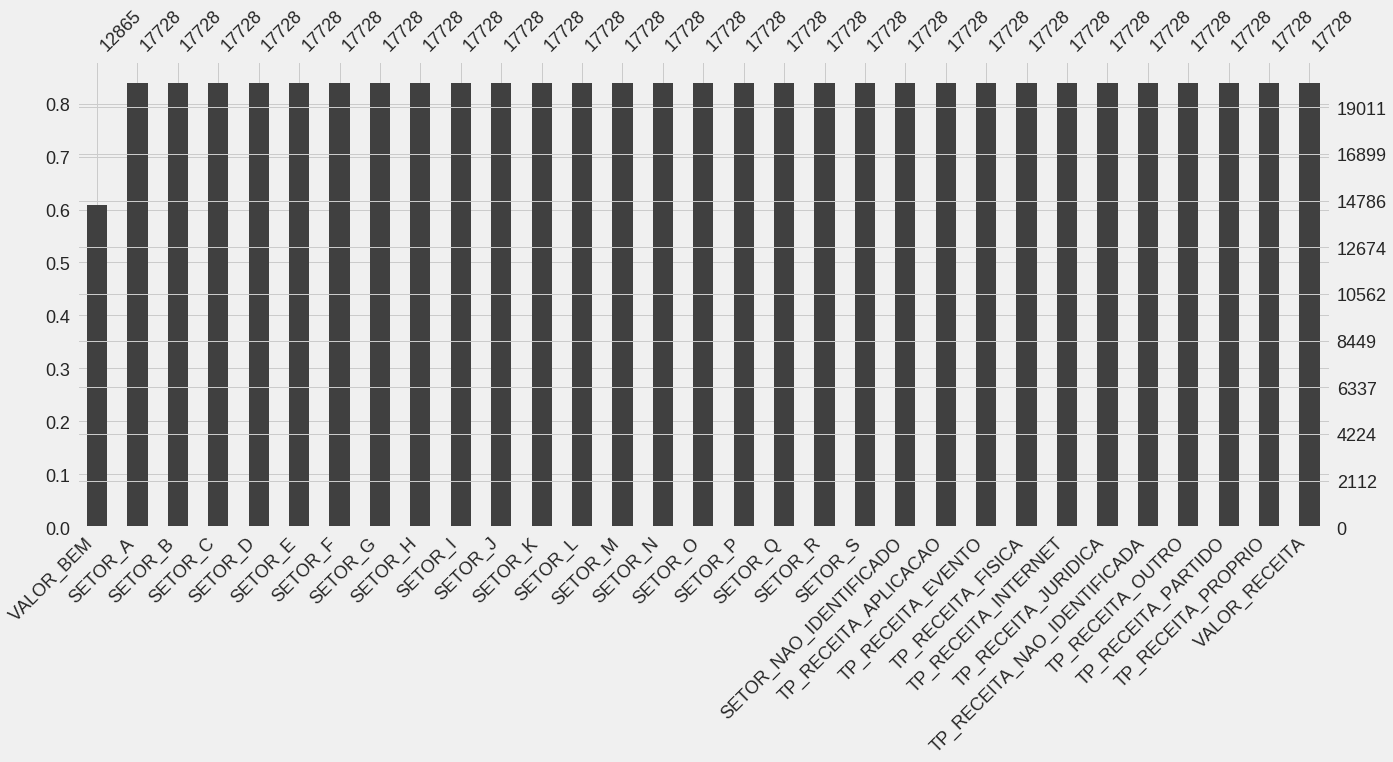

In [23]:
missingValueColumns = df_cand.columns[df_cand.isnull().any()].tolist()
df_null = df_cand[missingValueColumns]
msno.bar(df_null,figsize=(20,8), fontsize=18, labels=True)

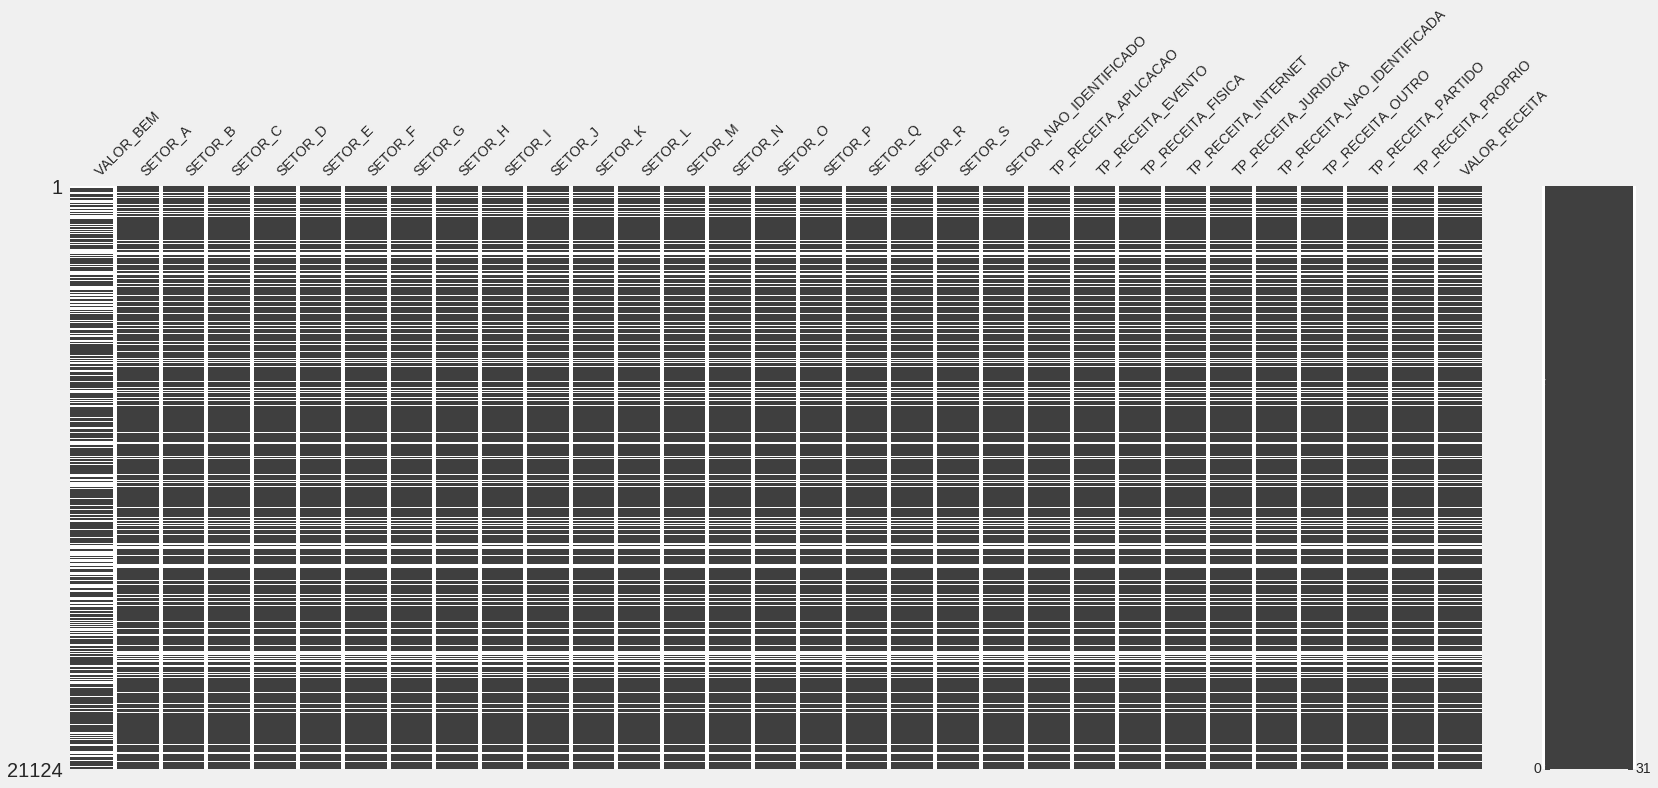

In [24]:
sorted_data = msno.nullity_sort(df_null) # sort = 'descending' or sort='ascending'
msno.matrix(sorted_data, fontsize=14)

Este dataset não possui uma quantidade significativa de dados faltantes.  
O atributo que mais possui dados faltantes é o valor dos bens, significando que estes candidatos não possuem nada no nome (na teoria). Alguns poucos candidatos também não tiveram dinheiro investido de doações.  
É coerente para estes dados faltantes substituí-los por zeros.

In [25]:
df_cand.fillna(.0, inplace=True)

### Análise de outliers

In [26]:
def make_boxplot_bokeh(df_analise_outliers, title, y_label):
    #todo - verificar problema que não filtra corretamente quando passado mais que um atributo por vez
    q1 = df_analise_outliers.quantile(q=0.25)
    q2 = df_analise_outliers.quantile(q=0.50)
    q3 = df_analise_outliers.quantile(q=0.75)
    iqr = q3-q1
    upper = pd.DataFrame(q3 + (1.5*iqr))
    upper.columns=['value']
    lower = pd.DataFrame(q1 - (1.5*iqr))
    lower.columns=['value']
    
    atrbs = list(df_analise_outliers.columns)

    # find the outliers for each category
    outs = pd.DataFrame()
    for atrib in atrbs:
        outs[atrib] = (df_analise_outliers[(df_analise_outliers[atrib] > upper.loc[atrib]['value']) | 
                                           (df_analise_outliers[atrib] < lower.loc[atrib]['value'])])[atrib]


    # prepare outlier data for plotting, we need coordinates for every outlier.
    outx = []
    outy = []
    for atrib in atrbs:
        for out in outs[atrib].dropna():
            outx.append(atrib)
            outy.append(out)

    #p = figure(x_range=atrbs, plot_height=int(PLOT_H/1.5), plot_width=int(PLOT_W/2))
    p = figure(x_range=atrbs, plot_height=PLOT_H, plot_width=PLOT_W)

    # if no outliers, shrink lengths of stems to be no longer than the minimums or maximums
    qmin = pd.DataFrame(df_analise_outliers.quantile(q=0.00))
    qmin.columns = ['value']
    qmax = pd.DataFrame(df_analise_outliers.quantile(q=1.00))
    qmax.columns = ['value']

    upper['value'] = [min([x,y]) for (x,y) in zip(list(qmax.loc[:,'value']),upper['value'])]
    lower['value'] = [min([x,y]) for (x,y) in zip(list(qmin.loc[:,'value']),lower['value'])]

    # stems
    p.segment(atrbs, upper['value'], atrbs, q3.values, line_color="black")
    p.segment(atrbs, lower['value'], atrbs, q1.values, line_color="black")

    # boxes
    p.vbar(atrbs, 0.7, q2.values, q3.values, fill_color="#E08E79", line_color="black")
    p.vbar(atrbs, 0.7, q1.values, q2.values, fill_color="#3B8686", line_color="black")


    # whiskers (almost-0 height rects simpler than segments)
    p.rect(atrbs, lower['value'], 0.2, 0.01, line_color="black")
    p.rect(atrbs, upper['value'], 0.2, 0.01, line_color="black")

    # outliers
    p.circle(outx, outy, size=6, color="#F38630", fill_alpha=0.6)

    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = "white"
    p.grid.grid_line_width = 2
    p.xaxis.major_label_text_font_size="8pt"
    p.xaxis.major_label_orientation=0
    
    p.title.align = 'center'
    p.title.text = title
    p.title.text_font_size = '14px'
    p.yaxis.axis_label = y_label

    show(p)
    return outs

In [27]:
df_cand[['IDADE_DATA_ELEICAO', 'DESPESA_MAX_CAMPANHA', 'VALOR_BEM', 'VALOR_RECEITA']].describe()

,IDADE_DATA_ELEICAO,DESPESA_MAX_CAMPANHA,VALOR_BEM,VALOR_RECEITA
count,21124.00,21124.00,21124.00,21124.00
mean,46.75,2759528.59,430926.83,114321.59
std,11.22,3933738.89,4912578.33,379515.13
min,20.00,0.00,0.00,0.00
25%,39.00,1000000.00,0.00,1020.22
50%,47.00,2000000.00,35376.29,6324.30
75%,54.00,4000000.00,283164.17,42983.44
max,91.00,90000000.00,610000000.00,6832480.98


In [28]:
#df_cand[['IDADE_DATA_ELEICAO', 'DESPESA_MAX_CAMPANHA', 'VALOR_BEM', 'valor_receita']]
outs = make_boxplot_bokeh(df_cand[['IDADE_DATA_ELEICAO']], 'Idades dos candidatos', 'Idade')

In [29]:
outs = make_boxplot_bokeh(df_cand[['VALOR_RECEITA']], 
                           'Receitas de doações', 'Valor')
pd.DataFrame(df_cand.loc[list(outs.index)].groupby(['TARGET'])['TARGET'].count())

,TARGET
TARGET,
0,2190
1,1475


In [30]:
outs = make_boxplot_bokeh(df_cand[['VALOR_BEM']], 
#outs = make_boxplot_bokeh(df_cand[['VALOR_BEM']], 
                           'Valor declarado de bens', 'Valor')
pd.DataFrame(df_cand.loc[list(outs.index)].groupby(['TARGET'])['TARGET'].count())

,TARGET
TARGET,
0,1687
1,814


In [31]:
outs = make_boxplot_bokeh(df_cand[['DESPESA_MAX_CAMPANHA']], 
                           'Despesa máxima campanha', 'Valor')
pd.DataFrame(df_cand.loc[list(outs.index)].groupby(['TARGET'])['TARGET'].count())

,TARGET
TARGET,
0,240
1,51


Os outliers detectados não serão removidos, pois eles não são erros no dataset e podem ser importantes para o objetivo deste trabalho.

### Análise de correlação entre os atributos

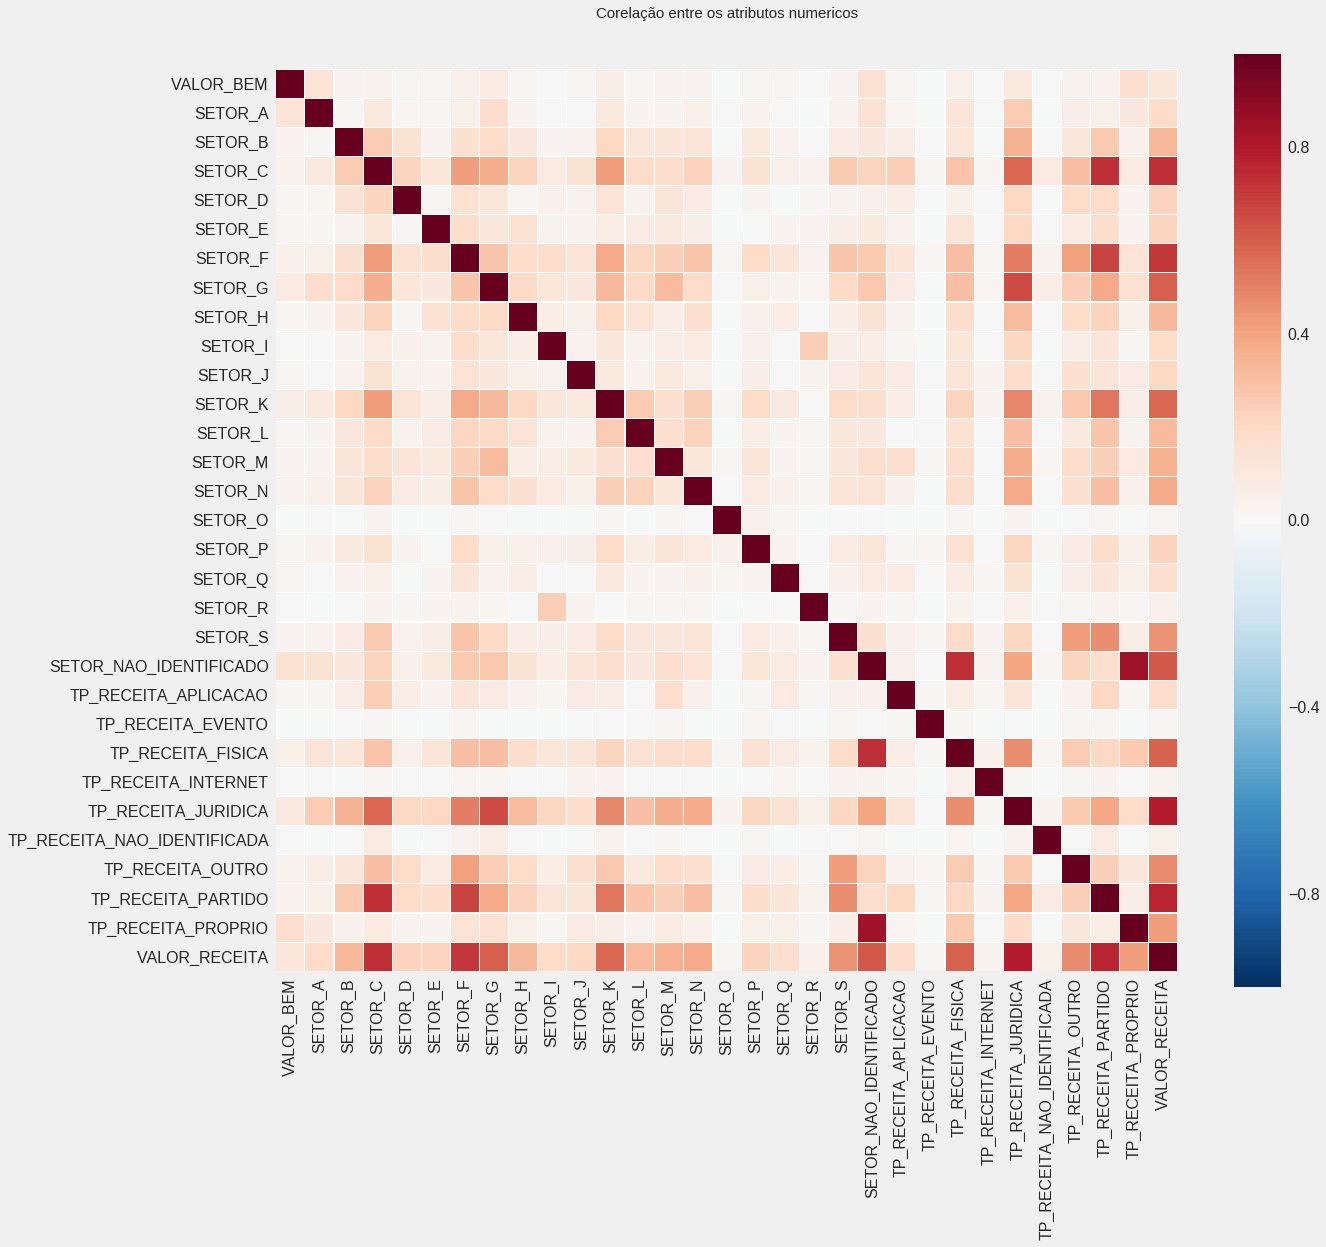

In [32]:
plt.figure(figsize=(18,16))
plt.title('Corelação entre os atributos numericos', y=1.05, size=15)
sns.heatmap(df_cand[col_interval].corr(),linewidths=0.1,vmax=1.0, square=True, linecolor='white', annot=False)
plt.show()

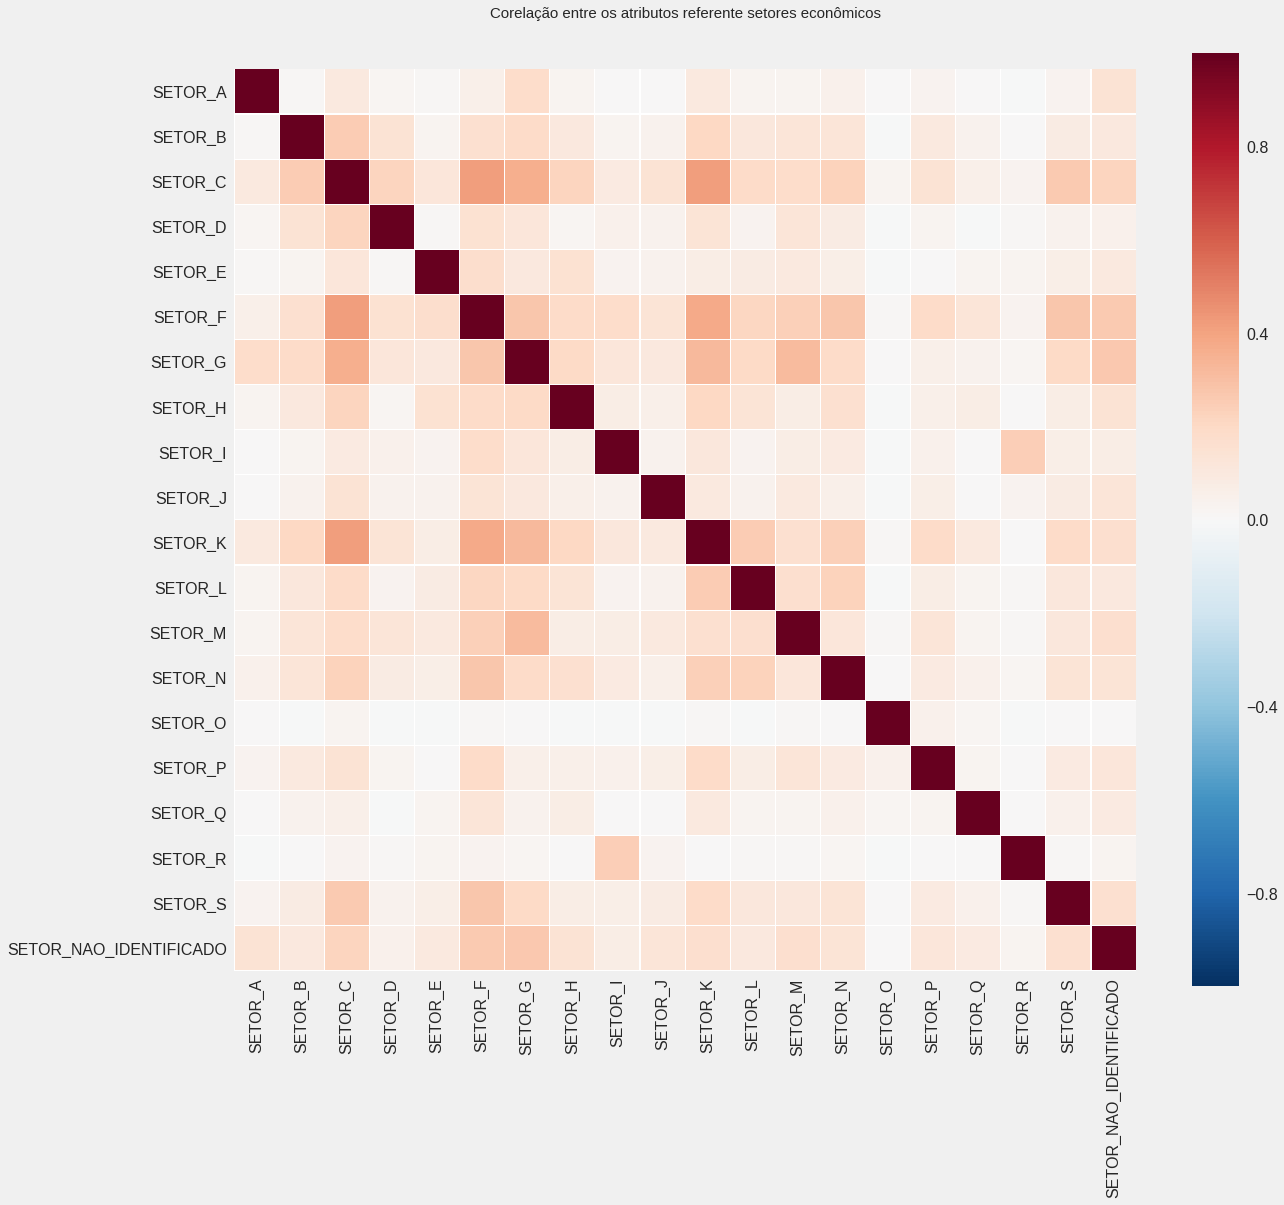

In [33]:
plt.figure(figsize=(18,16))
plt.title('Corelação entre os atributos referente setores econômicos', y=1.05, size=15)
sns.heatmap(df_cand[col_setor].corr(),linewidths=0.1,vmax=1.0, 
            square=True, linecolor='white', annot=False)
plt.show()

Certos setores possuem alguma correlação, apesar dela não ser muito forte.  
Os setores C, G, F e K são os que mais parecem correlacionados.  
Estes setores são respectivamente:  
Indústria de Transformação, Comércio, Construção, Atividades financeiras.

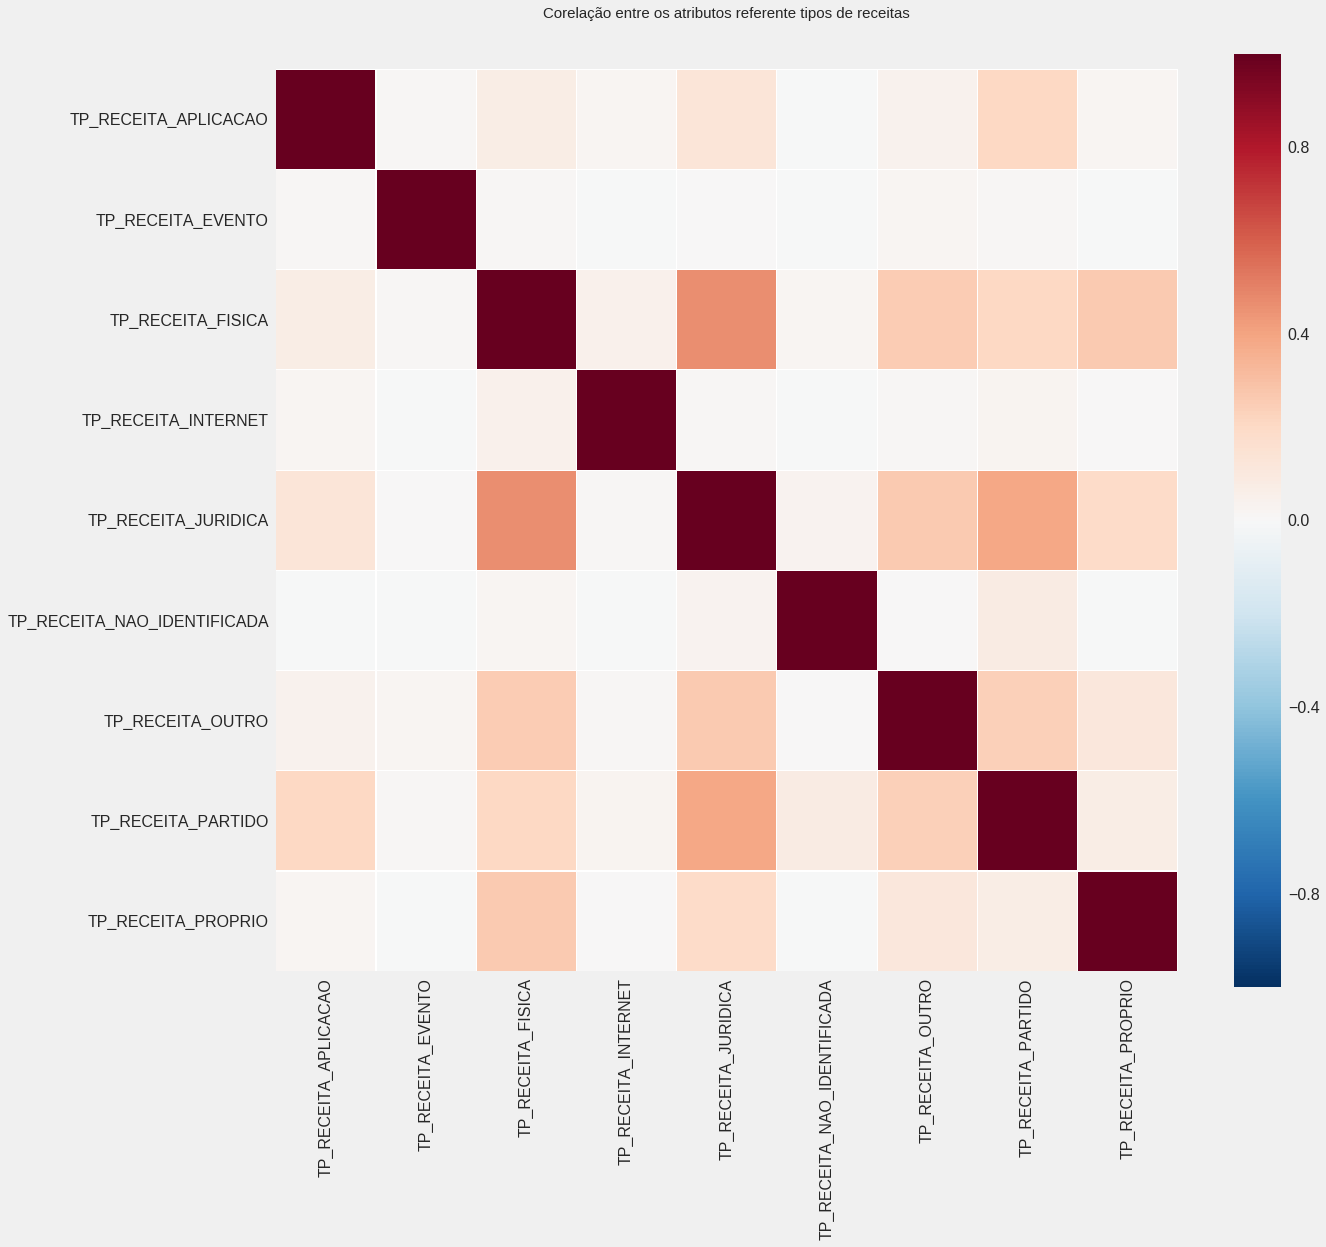

In [34]:
plt.figure(figsize=(18,16))
plt.title('Corelação entre os atributos referente tipos de receitas', y=1.05, size=15)
sns.heatmap(df_cand[col_tipo_receita].corr(),linewidths=0.1,vmax=1.0, 
            square=True, linecolor='white', annot=False)
plt.show()

### Respondendo algumas perguntas

<b>Quais são os setores econômicos que mais fazem doação a políticos?</b>

In [35]:

soma_setores = pd.DataFrame(df_cand[col_setor].sum().sort_values(ascending=False))
setores=list(soma_setores.index)
valores=list(soma_setores.values)

source = ColumnDataSource(data=dict(setores=setores, valores=valores, color=Category20[20]))

p = figure(x_range=setores, plot_height=PLOT_H, plot_width=PLOT_W)
p.vbar(x='setores', top='valores', color='color', width=0.9, source=source)

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.title.align = 'center'
p.title.text = 'Total de doações por setor econômico'
p.title.text_font_size = '14px'
p.yaxis.axis_label = 'Valores'
p.xaxis.axis_label = 'Setores'
p.xaxis.major_label_orientation = 45
p.yaxis.formatter=NumeralTickFormatter(format="0,0.00")

show(p)


Doações não identificadas são doações que não foram rastreadas. A quantidade deste tipo de doação é bem expressivo.  
Os setores C (Indústria), F (Construção) e S (Outras atividades de serviço/organizações políticas), G (Comércio) e K (Atividades Financeiras) são os que mais fizeram doações.

<b>Média de valores de bens declarados pelos candidatos</b>

In [36]:
media_bem = list([df_cand[df_cand['TARGET'] == 1]['VALOR_BEM'].mean(), 
                  df_cand[df_cand['TARGET'] == 0]['VALOR_BEM'].mean(), 
                  df_cand['VALOR_BEM'].mean()])
candidatos = ['Eleitos','Não Eleitos', 'Geral']

source = ColumnDataSource(data=dict(candidatos=candidatos, media_bem=media_bem, color=Category20[3]))

p = figure(x_range=candidatos, plot_height=PLOT_H, plot_width=PLOT_W)
p.vbar(x='candidatos', top='media_bem', color='color', width=0.9, source=source)

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.title.align = 'center'
p.title.text = 'Média do valor dos bens declarados pelos candidatos'
p.title.text_font_size = '14px'
p.yaxis.axis_label = 'Média bens'
p.xaxis.axis_label = 'Candidatos'
p.yaxis.formatter=NumeralTickFormatter(format="0,0.00")

show(p)

A média de valores dos bens declarados entre os candidatos eleitos é muito maior do que a média de todos os candidatos.

<b>Média do valor recebido por doações</b>

In [37]:
media_doacao = list([df_cand[df_cand['TARGET'] == 1]['VALOR_RECEITA'].mean(),
                     df_cand[df_cand['TARGET'] == 0]['VALOR_RECEITA'].mean(),
                     df_cand['VALOR_RECEITA'].mean()])
candidatos = ['Eleitos','Não Eleitos', 'Geral']

source = ColumnDataSource(data=dict(candidatos=candidatos, media_doacao=media_doacao, color=Category20[3]))

p = figure(x_range=candidatos, plot_height=PLOT_H, plot_width=PLOT_W)
p.vbar(x='candidatos', top='media_doacao', color='color', width=0.9, source=source)

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.title.align = 'center'
p.title.text = 'Média do valor recebido por doação'
p.title.text_font_size = '14px'
p.yaxis.axis_label = 'Média doação'
p.xaxis.axis_label = 'Candidatos'
p.yaxis.formatter=NumeralTickFormatter(format="0,0.00")

show(p)

O valor médio de doações recebidas pelos candidatos eleitos também é bem superior da média de todos candidatos.

In [38]:
def make_chart_bokeh(atrb, idx_col_rename, idx_rename, title, first_rows=20):
    for x in range (0,2):
        if x == 0:
            df_chart = pd.DataFrame(df_cand.groupby([atrb])[atrb].count())
            title2 = ' (todos)'
        else:
            df_chart = pd.DataFrame(df_cand[df_cand['TARGET'] == 1].groupby([atrb])[atrb].count())
            title2 = ' (apenas eleitos)'

        df_chart.columns=['QUANTIDADE']
        df_chart.index.name=idx_col_rename
        if idx_rename != None:
            df_chart.rename(index = idx_rename, inplace=True)
        df_chart.sort_values(['QUANTIDADE'], ascending=False, inplace=True)
        
        if first_rows > 0:
            df_chart = df_chart.head(first_rows)
    
        x = list(df_chart.index)
        y = list((df_chart['QUANTIDADE'] / np.sum(df_chart['QUANTIDADE'])) * 100)
        y = [float(Decimal("%.2f" % e)) for e in y]

        color = Category20[20][:len(x)] #list(viridis(len(x)))

   
        source = ColumnDataSource(data=dict(x=x, y=y, color=color))
        p = figure(x_range=x, plot_height=PLOT_H, plot_width=PLOT_W)
        p.vbar(x='x', top='y', color='color', width=0.9, source=source)
        p.xgrid.grid_line_color = None
        p.y_range.start = 0    
        p.yaxis.axis_label = '%'
        p.xaxis.axis_label = idx_col_rename
        
        if df_chart.shape[0] > 5:
            p.xaxis.major_label_orientation = 45
        else:
            p.xaxis.major_label_orientation = 0
        
        labels = LabelSet(x='x', y='y', text='y', level='glyph',
                      x_offset=-13.5, y_offset=0, source=source, render_mode='canvas')
        p.add_layout(labels)
    
        p.title.text = title+title2
        p.title.text_font_size = '14px'
        p.title.align = 'center'
    
        show(p)


In [39]:
def make_chart_bokeh_v2(atrb, idx_col_rename, idx_rename, title, first_rows=20):
    df_chart_t0 = pd.DataFrame(df_cand.groupby([atrb])[atrb].count())
    df_chart_t1 = pd.DataFrame(df_cand[df_cand['TARGET'] == 1].groupby([atrb])[atrb].count())

    for dfx in (df_chart_t0, df_chart_t1):
        dfx.index.name = idx_col_rename
        dfx.columns=['QUANTIDADE']
        if idx_rename != None:
            dfx.rename(index = idx_rename, inplace=True)
            
    df_chart_t0.sort_values(['QUANTIDADE'], ascending=False, inplace=True)
    
    df_chart_t1 = df_chart_t1.reindex(df_chart_t0.index)
    
    if first_rows > 0:
        df_chart_t0 = df_chart_t0.head(first_rows)
    
    x = list(df_chart_t0.index)
    
    y0 = list((df_chart_t0['QUANTIDADE'] / np.sum(df_chart_t0['QUANTIDADE'])) * 100)
    y0 = [float(Decimal("%.2f" % e)) for e in y0]
  
    y1 = list((df_chart_t1['QUANTIDADE'] / np.sum(df_chart_t1['QUANTIDADE'])) * 100)
    y1 = [float(Decimal("%.2f" % e)) for e in y1]

     
    data = {'x' : x,
            'y0': y0,
            'y1': y1}
    
    source = ColumnDataSource(data=data)

    p = figure(x_range=x, y_range=(0, 100), plot_height=PLOT_H, plot_width=PLOT_W)

    p.vbar(x=dodge('x', -0.2, range=p.x_range), top='y0', width=0.4, source=source,
           color=Category20[3][0], legend=value("Todos Candidatos"))

    p.vbar(x=dodge('x', 0.2, range=p.x_range), top='y1', width=0.4, source=source,
           color=Category20[3][1], legend=value("Candidatos Eleitos"))
    
    if df_chart_t0.shape[0] == 2:
        x_offset1 = -85
        x_offset2 = 55
    elif df_chart_t0.shape[0] == 5:
        x_offset1 = -50
        x_offset2 = 5
    else:
        x_offset1 = -25
        x_offset2 = 0
    
    labels0 = LabelSet(x='x', y='y0', text='y0', level='glyph',
                      x_offset=x_offset1, y_offset=0, source=source, render_mode='canvas')
    p.add_layout(labels0)    

    labels1 = LabelSet(x='x', y='y1', text='y1', level='glyph',
                      x_offset=x_offset2, y_offset=0, source=source, render_mode='canvas')
    p.add_layout(labels1)    
    
    
    p.xgrid.grid_line_color = None
    p.y_range.start = 0    
    p.yaxis.axis_label = '%'
    p.xaxis.axis_label = idx_col_rename
    
    p.title.text = title
    p.title.text_font_size = '14px'
    p.title.align = 'center'
    
    if df_chart_t0.shape[0] > 5:
        p.xaxis.major_label_orientation = 45
    else:
        p.xaxis.major_label_orientation = 0    
    
    

    display(df_chart_t0)
    display(df_chart_t1)
    
    show(p)

In [40]:
make_chart_bokeh_v2(atrb='CODIGO_SEXO', idx_col_rename='GENERO', 
           idx_rename={2:'Masculino', 4:'Feminino'}, 
           title='Gênero dos candidatos')

,QUANTIDADE
GENERO,
Masculino,14962
Feminino,6162


,QUANTIDADE
GENERO,
Masculino,1402
Feminino,170


Dentre os candidatos é possível perceber que há ainda muita desigualdade entre os gêneros masculino e feminino. Esta desigualdade se mostra muito mais evidente entre os candidatos eleitos.

In [41]:
make_chart_bokeh_v2(atrb='CODIGO_COR_RACA', idx_col_rename='COR/RAÇA', 
           idx_rename={1:'Branca', 2:'Preta', 3:'Parda', 4:'Amarela', 5:'Indígena'}, 
           title='Raça/Cor dos candidatos')

,QUANTIDADE
COR/RAÇA,
Branca,11695
Parda,7350
Preta,1911
Amarela,99
Indígena,69


,QUANTIDADE
COR/RAÇA,
Branca,1185
Parda,334
Preta,50
Amarela,2
Indígena,1


A desigualdade entre a raça/cor é ainda mais evidente. Entre todos candidatos, a raça de cor branca corresponde a 55.36% dos candidatos. Já entre os eleitos a porcentagem fica em 75,38%

In [42]:
idx_rename = {999:'OUTROS', 257:'EMPRESÁRIO', 131:'ADVOGADO', 277:'DEPUTADO', 278:'VEREADOR', 169:'COMERCIANTE',
              297:'SERV. PÚB. EST.',266:'PROF. ENS. MÉDIO', 125:'ADMINISTRADOR', 111:'MEDICO', 101:'ENGENHEIRO'}
    
make_chart_bokeh_v2(atrb='CODIGO_OCUPACAO', idx_col_rename='OCUPAÇÃO', 
           idx_rename=idx_rename, 
           title='Ocupação do Candidato',
           first_rows=10)

/home/eliezer/anaconda3/lib/python3.6/site-packages/bokeh/models/sources.py:137: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('x', 10), ('y0', 10), ('y1', 208)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))


,QUANTIDADE
OCUPAÇÃO,
OUTROS,3417
EMPRESÁRIO,1998
ADVOGADO,1173
DEPUTADO,964
VEREADOR,935
COMERCIANTE,857
SERV. PÚB. EST.,791
PROF. ENS. MÉDIO,625
ADMINISTRADOR,572


,QUANTIDADE
OCUPAÇÃO,
OUTROS,84.00
EMPRESÁRIO,137.00
ADVOGADO,134.00
DEPUTADO,681.00
VEREADOR,67.00
COMERCIANTE,12.00
SERV. PÚB. EST.,25.00
PROF. ENS. MÉDIO,17.00
ADMINISTRADOR,45.00


Apesar de outras ocupações, empresários e advogados totalizarem 55,6% dos candidatos, isto não reflete na ocupação dos candidatos eleitos, onde predomina a profissão Deputado (ou seja, são deputados reeleitos). Estes dados confirmam a pouca renovação política existente.

<b>Histograma da idade dos candidatos</b>

In [43]:
hist, edges = np.histogram(df_cand['IDADE_DATA_ELEICAO'], density=True)
hist_e, edges_e = np.histogram(df_cand[df_cand['TARGET']==1]['IDADE_DATA_ELEICAO'], density=True)

p = figure(title = "Histograms",plot_height=PLOT_H, plot_width=PLOT_W)
p.y_range.start = 0
p.xgrid.grid_line_color = None
p.xaxis.axis_label = 'Idade'

p.title.text = 'Histograma da idade dos candidatos'
p.title.text_font_size = '14px'
p.title.align = 'center'

p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
       line_color = 'black', alpha=0.5, legend = 'Todos candidatos')
p.quad(top=hist_e, bottom=0, left=edges_e[:-1], right=edges_e[1:],
       line_color = 'black', color = 'red', alpha=0.5, legend = 'Candidatos eleitos')

show(p)

### Importância dos atributos com Random Forest

In [44]:
clf = RandomForestClassifier(n_estimators=200, max_depth=10, 
                             min_samples_leaf=4, max_features=0.2, 
                             n_jobs=-1, random_state=42)
clf.fit(df_cand.drop(['TARGET'],axis=1), df_cand['TARGET'])
features = df_cand.drop(['TARGET'],axis=1).columns.values
print('Treino Concluído')

Treino Concluído


In [45]:
def get_feature_importance_df(feature_importances, 
                              column_names, 
                              top_n=20):
    """Get feature importance data frame.
 
    Parameters
    ----------
    feature_importances : numpy ndarray
        Feature importances computed by an ensemble 
            model like random forest or boosting
    column_names : array-like
        Names of the columns in the same order as feature 
            importances
    top_n : integer
        Number of top features
 
    Returns
    -------
    df : a Pandas data frame
 
    """
     
    imp_dict = dict(zip(column_names, 
                        feature_importances))
    top_features = sorted(imp_dict, 
                          key=imp_dict.get, 
                          reverse=True)[0:top_n]
    top_importances = [imp_dict[feature] for feature 
                          in top_features]
    df = pd.DataFrame(data={'feature': top_features, 
                            'importance': top_importances})
    return df

In [46]:
feature_importance = get_feature_importance_df(clf.feature_importances_, features)
feature_importance = feature_importance.sort_values(['importance'], ascending=False)
feature_importance

,feature,importance
0,VALOR_RECEITA,0.21
1,SETOR_NAO_IDENTIFICADO,0.13
2,TP_RECEITA_FISICA,0.11
3,TP_RECEITA_JURIDICA,0.07
4,SETOR_C,0.06
5,TP_RECEITA_PROPRIO,0.05
6,TP_RECEITA_PARTIDO,0.05
7,SETOR_F,0.04
8,SETOR_G,0.04
9,VALOR_BEM,0.04


In [47]:
features=list(feature_importance['feature'])
importance=list(feature_importance['importance'])


source = ColumnDataSource(data=dict(features=features, importance=importance, color=Category20[20]))
p = figure(x_range=features, plot_height=PLOT_H, plot_width=PLOT_W)
p.vbar(x='features', top='importance', color='color', width=0.9, source=source)
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.title.align = 'center'
p.title.text = 'Importância dos atributos'
p.title.text_font_size = '14px'
p.yaxis.axis_label = 'Importância'
p.xaxis.axis_label = 'Atributos'
p.xaxis.major_label_orientation = 45 
    
show(p)


### <center> Parte 3 - Modelos</center>

#### Separa os dados utilizados na pesquisa para testar o modelo no final com o benchmark

In [48]:
# Carrega o dataframe com os candidatos utilizados na pesquisa para usar posteriormente
# para comparar o modelo com o benchmark
df_pesquisa = pickle.load(open('df_pesquisa.p', 'rb'))
print('Total de candidatos na pesquisa:', df_pesquisa.shape[0])
print('Total de candidatos: ', df_cand.shape[0])
df_pesquisa = df_cand.loc[list(df_pesquisa.index.values)]
df_cand.drop(df_cand.index[list(df_pesquisa.index.values)], inplace=True) #exclui os candidatos utilizados na pesquisa
print('Total de candidatos após remoção: ', df_cand.shape[0])

Total de candidatos na pesquisa: 1114
Total de candidatos:  21124
Total de candidatos após remoção:  20010


#### Separação do dataset com model_selection em dois conjuntos: Treino e Teste

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df_cand.drop(['TARGET'],axis=1), 
                                                    df_cand['TARGET'], 
                                                    test_size=0.25,
                                                    random_state=42)

#Abaixo, alguns testes realizados, removendo alguns atributos
#col_tipo_receita  = meta_data[(meta_data.tipovalor == 'tipo_receita') & (meta_data.keep)].index
#col_setor  = meta_data[(meta_data.tipovalor == 'setor_economico') & (meta_data.keep)].index
#col_interval = meta_data[(meta_data.level == 'interval') & (meta_data.keep)].index
#col_nominal = meta_data[(meta_data.level == 'nominal') & (meta_data.keep)].index

#X_train = remove_columns(X_train, col_tipo_receita)
#X_test = remove_columns(X_test, col_tipo_receita)

#X_train = remove_columns(X_train, 'VALOR_BEM')
#X_test = remove_columns(X_test, 'VALOR_BEM')

### Realiza testes com alguns algoritmos

#### Validação cruzada

In [50]:
def cross_val_model(X,y, model, n_splits=3):
    scores = []
    X = np.array(X)
    y = np.array(y)

    folds = list(StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42).split(X, y))

    for j, (train_idx, test_idx) in enumerate(folds):
        X_train = X[train_idx]
        y_train = y[train_idx]
        X_holdout = X[test_idx]
        y_holdout = y[test_idx]
        
        name = type(model).__name__#str(model).split('(')[0]
        print ("Fit %s fold %d" % (name, j+1))
        model.fit(X_train, y_train)
        cross_score = cross_val_score(model, X_holdout, y_holdout, cv=3, scoring='f1') #roc_auc
        scores.append(cross_score.mean())
        print("    cross_score: %.5f" % cross_score.mean())
    
    return scores

#### Testes iniciais com LinearSVC, KNeighborsClassifier,  RandomForestClassifier e XGBClassifier

In [51]:
def test_classifiers(X,y, title):
    scores = []
    names = []
    classifiers = [LinearSVC(random_state=42),
                   KNeighborsClassifier(),
                   RandomForestClassifier(random_state=42),
                   XGBClassifier(),
                   GaussianNB()]
    
    splits = 3
   
    for clf in classifiers:
        score = cross_val_model(X, y, clf, splits)
        scores.append(score)
        names.append(type(clf).__name__)
        print ('Mean:',np.mean(score))
        print('-'*10)
        
    p = figure(plot_height=PLOT_H, plot_width=PLOT_W)
    p.title.align = 'center'
    p.title.text = title
    p.title.text_font_size = '14px'
    p.yaxis.axis_label = 'F1 Score'
    p.xaxis.axis_label = 'Fold'    


    x = list(np.arange(splits)+1)
    for name, scores, color in zip(names, scores, Dark2[5]):
        p.line(x, sorted(scores), legend=name, line_color=color, line_dash="solid")        
    
    p.legend.background_fill_alpha = 0.5
    p.legend.location = "bottom_right"       
    
    show(p)

In [52]:
test_classifiers(X_train, y_train, 'Desempenho dos classificadores nos dados originais')


Fit LinearSVC fold 1
    cross_score: 0.49507
Fit LinearSVC fold 2
    cross_score: 0.39671
Fit LinearSVC fold 3
    cross_score: 0.36671
Mean: 0.419498739884
----------
Fit KNeighborsClassifier fold 1
    cross_score: 0.48520
Fit KNeighborsClassifier fold 2
    cross_score: 0.50272
Fit KNeighborsClassifier fold 3
    cross_score: 0.46778
Mean: 0.48523287598
----------
Fit RandomForestClassifier fold 1
    cross_score: 0.52125
Fit RandomForestClassifier fold 2
    cross_score: 0.51005
Fit RandomForestClassifier fold 3
    cross_score: 0.55593
Mean: 0.529079566007
----------
Fit XGBClassifier fold 1
    cross_score: 0.62662
Fit XGBClassifier fold 2
    cross_score: 0.62375
Fit XGBClassifier fold 3
    cross_score: 0.66290
Mean: 0.637758265885
----------
Fit GaussianNB fold 1
    cross_score: 0.53916
Fit GaussianNB fold 2
    cross_score: 0.54199
Fit GaussianNB fold 3
    cross_score: 0.57529
Mean: 0.552147544438
----------


#### Como este e um problema com classes desbalanceadas, utiliza imblearn para contornar

In [53]:
# Utiliza CondensedNearestNeighbour para resolver o problema do dataset desbalanceado.
# Este foi o modelo que obteve melhor resultado, entretanto é o mais lento.
# Para ganhar tempo na análise, salvei os dados já ajustados
if os.path.isfile('X_resampled.p') and (os.path.isfile('y_resampled.p')): 
    X_resampled = pickle.load(open('X_resampled.p', 'rb'))
    y_resampled = pickle.load(open('y_resampled.p', 'rb'))
else:
    from imblearn.under_sampling import CondensedNearestNeighbour
    cnn = CondensedNearestNeighbour(random_state=42, n_jobs=-1)
    X_resampled, y_resampled = cnn.fit_sample(X_train, y_train)
    pickle.dump( X_resampled, open( "X_resampled.p", "wb" ) )
    pickle.dump( y_resampled, open( "y_resampled.p", "wb" ) ) 


In [54]:
print('Dados originais: ',len(X_train))
print('Under Sampling:', len(X_resampled))
print('-'*10)
test_classifiers(X_resampled, y_resampled, 'Desempenho dos classificadores após utilizar CondensedNearestNeighbour')

Dados originais:  15007
Under Sampling: 2195
----------
Fit LinearSVC fold 1
    cross_score: 0.53580
Fit LinearSVC fold 2
    cross_score: 0.57692
Fit LinearSVC fold 3
    cross_score: 0.38117
Mean: 0.497965315123
----------
Fit KNeighborsClassifier fold 1
    cross_score: 0.57738
Fit KNeighborsClassifier fold 2
    cross_score: 0.56989
Fit KNeighborsClassifier fold 3
    cross_score: 0.58360
Mean: 0.576957369701
----------
Fit RandomForestClassifier fold 1
    cross_score: 0.63529
Fit RandomForestClassifier fold 2
    cross_score: 0.67795
Fit RandomForestClassifier fold 3
    cross_score: 0.64814
Mean: 0.653792533085
----------
Fit XGBClassifier fold 1
    cross_score: 0.69820
Fit XGBClassifier fold 2
    cross_score: 0.70653
Fit XGBClassifier fold 3
    cross_score: 0.71766
Mean: 0.707461011883
----------
Fit GaussianNB fold 1
    cross_score: 0.38875
Fit GaussianNB fold 2
    cross_score: 0.46845
Fit GaussianNB fold 3
    cross_score: 0.45425
Mean: 0.437151709944
----------


In [55]:
# Cria novo DataFrame com os dados ajustados
columns = list(X_train.columns)
X_train = pd.DataFrame(X_resampled)
X_train.columns = columns
y_train = y_resampled

### Otimização dos parâmetros nos dois algoritmos com melhor score


#### RandomForest

In [56]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [57]:
param_dist = {"max_depth": [2, 3, 5, 10, 20, 30, None], 
              "max_features": st.randint(2, len(X_train.columns)),
              "min_samples_split": st.randint(2, 30),
              "min_samples_leaf": st.randint(1, 11),
              "n_estimators": st.randint(5, 200),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
              "class_weight": ['balanced','balanced_subsample', None]}


clf = RandomForestClassifier(random_state=42, n_jobs=-1)
    
# run randomized search
n_iter_search = 100
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, scoring='f1', n_jobs=-1)

start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)


RandomizedSearchCV took 107.64 seconds for 100 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.731 (std: 0.037)
Parameters: {'bootstrap': True, 'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 5, 'max_features': 37, 'min_samples_leaf': 6, 'min_samples_split': 12, 'n_estimators': 13}

Model with rank: 2
Mean validation score: 0.728 (std: 0.038)
Parameters: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 10, 'max_features': 35, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 94}

Model with rank: 3
Mean validation score: 0.727 (std: 0.027)
Parameters: {'bootstrap': True, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 8, 'min_samples_leaf': 9, 'min_samples_split': 22, 'n_estimators': 91}



#### XGBClassifier
Para otimizar este classificador segui este processo:   
https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [58]:
def modelfit(alg, X, y, X_test, y_test, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X, label=y)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], 
                          nfold=cv_folds, metrics='auc', early_stopping_rounds=early_stopping_rounds, 
                          verbose_eval=False)
        print('n_estimators=',cvresult.shape[0])
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(X, y, eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(X)
    dtrain_predprob = alg.predict_proba(X)[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy (Train): %.4g" % accuracy_score(y, dtrain_predictions))
    print ("AUC Score (Train): %f" % roc_auc_score(y, dtrain_predprob))    
    print ("F1 Score (Train): %f" % f1_score(y, dtrain_predictions))    

#     Predict on testing data:
    dtest_predictions = alg.predict(X_test)
    dtest_predprob = alg.predict_proba(X_test)[:,1]
    
    print ("\nAccuracy (Test) : %.4g" % accuracy_score(y_test, dtest_predictions))
    print ("AUC Score (Test): %f" % roc_auc_score(y_test, dtest_predprob))    
    print ("F1 Score (Test): %f" % f1_score(y_test, dtest_predictions))      
    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

n_estimators= 48

Model Report
Accuracy (Train): 0.7818
AUC Score (Train): 0.860487
F1 Score (Train): 0.784525

Accuracy (Test) : 0.9454
AUC Score (Test): 0.964658
F1 Score (Test): 0.676923


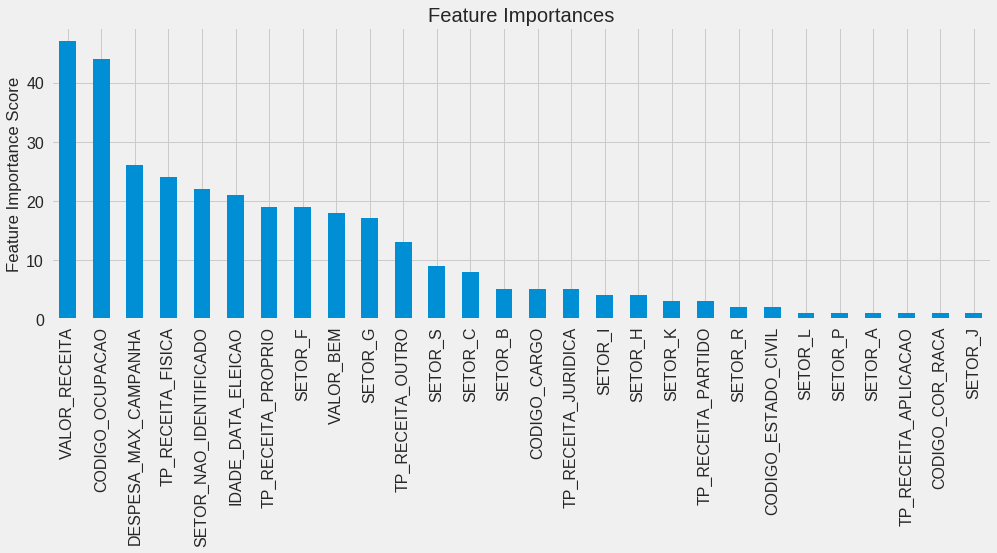

In [59]:
# PASSO 1: Descobrir o melhor número de estimators para um learning_rate de 0.1
xgb1 = XGBClassifier(learning_rate =0.1,
                     n_estimators=1000,
                     max_depth=3,
                     min_child_weight=1,
                     gamma=0,
                     subsample=0.85,
                     colsample_bytree=0.85,
                     objective= 'binary:logistic',
                     nthread=-1,
                     scale_pos_weight=1,
                     seed=27)

modelfit(xgb1, X_train, y_train, X_test, y_test)

In [60]:
def show_results(gsearch):
    means = gsearch.cv_results_['mean_test_score']
    stds = gsearch.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, gsearch.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

    print('\nBest Param:', gsearch.best_params_)
    print('\nBest Score:', gsearch.best_score_)

In [61]:
#PASSO 2: escolher max_depth e min_child_weight com base em um intervalo de 2 em 2
param_test1 = {'max_depth':range(3,10,2),
               'min_child_weight':range(1,6,2)
              }

clf = XGBClassifier(learning_rate=0.1, 
                    n_estimators=48, 
                    max_depth=3,
                    min_child_weight=1, 
                    gamma=0, 
                    subsample=0.85, 
                    colsample_bytree=0.85,
                    objective= 'binary:logistic', 
                    nthread=-1, scale_pos_weight=1, seed=27) 

gsearch1 = GridSearchCV(estimator = clf, param_grid = param_test1, 
                        scoring='roc_auc',n_jobs=-1,iid=False, cv=5, return_train_score=True)
#gsearch1.return_train_score=True
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.85,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=48, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.85),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'max_depth': range(3, 10, 2), 'min_child_weight': range(1, 6, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [62]:
show_results(gsearch1)

0.795 (+/-0.099) for {'max_depth': 3, 'min_child_weight': 1}
0.797 (+/-0.099) for {'max_depth': 3, 'min_child_weight': 3}
0.796 (+/-0.097) for {'max_depth': 3, 'min_child_weight': 5}
0.790 (+/-0.098) for {'max_depth': 5, 'min_child_weight': 1}
0.796 (+/-0.096) for {'max_depth': 5, 'min_child_weight': 3}
0.793 (+/-0.096) for {'max_depth': 5, 'min_child_weight': 5}
0.787 (+/-0.106) for {'max_depth': 7, 'min_child_weight': 1}
0.786 (+/-0.107) for {'max_depth': 7, 'min_child_weight': 3}
0.791 (+/-0.101) for {'max_depth': 7, 'min_child_weight': 5}
0.783 (+/-0.102) for {'max_depth': 9, 'min_child_weight': 1}
0.784 (+/-0.104) for {'max_depth': 9, 'min_child_weight': 3}
0.791 (+/-0.101) for {'max_depth': 9, 'min_child_weight': 5}

Best Param: {'max_depth': 3, 'min_child_weight': 3}

Best Score: 0.796847281759


In [63]:
# como o passo foi de 2 em 2, agora fazer a sintonia fina, escolhendo o melhor ajuste
param_test2 = {'max_depth':[2,3,4],
               'min_child_weight':[2,3,4]
              }

clf = XGBClassifier(learning_rate=0.1, 
                    n_estimators=48, 
                    max_depth=3, 
                    min_child_weight=3, 
                    gamma=0, 
                    subsample=0.85, 
                    colsample_bytree=0.85,
                    objective= 'binary:logistic', 
                    nthread=-1, scale_pos_weight=1, seed=27)

gsearch2 = GridSearchCV(estimator = clf, param_grid = param_test2, 
                        scoring='roc_auc', n_jobs=-1, iid=False, cv=5)
gsearch2.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.85,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=3, missing=None, n_estimators=48, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.85),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4], 'min_child_weight': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [64]:
show_results(gsearch2)

0.795 (+/-0.105) for {'max_depth': 2, 'min_child_weight': 2}
0.794 (+/-0.105) for {'max_depth': 2, 'min_child_weight': 3}
0.794 (+/-0.105) for {'max_depth': 2, 'min_child_weight': 4}
0.797 (+/-0.100) for {'max_depth': 3, 'min_child_weight': 2}
0.797 (+/-0.099) for {'max_depth': 3, 'min_child_weight': 3}
0.798 (+/-0.098) for {'max_depth': 3, 'min_child_weight': 4}
0.796 (+/-0.097) for {'max_depth': 4, 'min_child_weight': 2}
0.794 (+/-0.098) for {'max_depth': 4, 'min_child_weight': 3}
0.792 (+/-0.100) for {'max_depth': 4, 'min_child_weight': 4}

Best Param: {'max_depth': 3, 'min_child_weight': 4}

Best Score: 0.797776047733


In [65]:
# testando melhores parametros para min_child_weight com valores mais altos
param_test2b = {'min_child_weight':[4,5,6,8,10,12]}

clf = XGBClassifier(learning_rate=0.1, 
                    n_estimators=48, 
                    max_depth=3,
                    min_child_weight=3, 
                    gamma=0, 
                    subsample=0.85, 
                    colsample_bytree=0.85,
                    objective= 'binary:logistic', 
                    nthread=-1, scale_pos_weight=1, seed=27)

gsearch2b = GridSearchCV(estimator = clf, param_grid = param_test2b, 
                         scoring='roc_auc',n_jobs=-1,iid=False, cv=5)
gsearch2b.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.85,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=3, missing=None, n_estimators=48, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.85),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'min_child_weight': [4, 5, 6, 8, 10, 12]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [66]:
show_results(gsearch2b)

0.798 (+/-0.098) for {'min_child_weight': 4}
0.796 (+/-0.097) for {'min_child_weight': 5}
0.797 (+/-0.098) for {'min_child_weight': 6}
0.797 (+/-0.097) for {'min_child_weight': 8}
0.796 (+/-0.097) for {'min_child_weight': 10}
0.796 (+/-0.095) for {'min_child_weight': 12}

Best Param: {'min_child_weight': 4}

Best Score: 0.797776047733


In [67]:
#PASSO busca o melhor valor para gamma
param_test3 = {'gamma':[i/10.0 for i in range(0,10)]}

clf = XGBClassifier(learning_rate=0.1, 
                    n_estimators=48, 
                    max_depth=3,
                    min_child_weight=4, 
                    gamma=0, 
                    subsample=0.85, 
                    colsample_bytree=0.85, 
                    objective= 'binary:logistic', 
                    nthread=-1, scale_pos_weight=1, seed=27)

gsearch3 = GridSearchCV(estimator = clf, param_grid = param_test3, 
                        scoring='roc_auc',n_jobs=-1,iid=False, cv=5)
gsearch3.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.85,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=4, missing=None, n_estimators=48, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.85),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [68]:
show_results(gsearch3)

0.798 (+/-0.098) for {'gamma': 0.0}
0.798 (+/-0.098) for {'gamma': 0.1}
0.798 (+/-0.098) for {'gamma': 0.2}
0.798 (+/-0.097) for {'gamma': 0.3}
0.798 (+/-0.097) for {'gamma': 0.4}
0.798 (+/-0.096) for {'gamma': 0.5}
0.798 (+/-0.096) for {'gamma': 0.6}
0.796 (+/-0.099) for {'gamma': 0.7}
0.796 (+/-0.100) for {'gamma': 0.8}
0.796 (+/-0.100) for {'gamma': 0.9}

Best Param: {'gamma': 0.3}

Best Score: 0.798362371481


n_estimators= 45

Model Report
Accuracy (Train): 0.7759
AUC Score (Train): 0.854961
F1 Score (Train): 0.780944

Accuracy (Test) : 0.9444
AUC Score (Test): 0.964140
F1 Score (Test): 0.672941


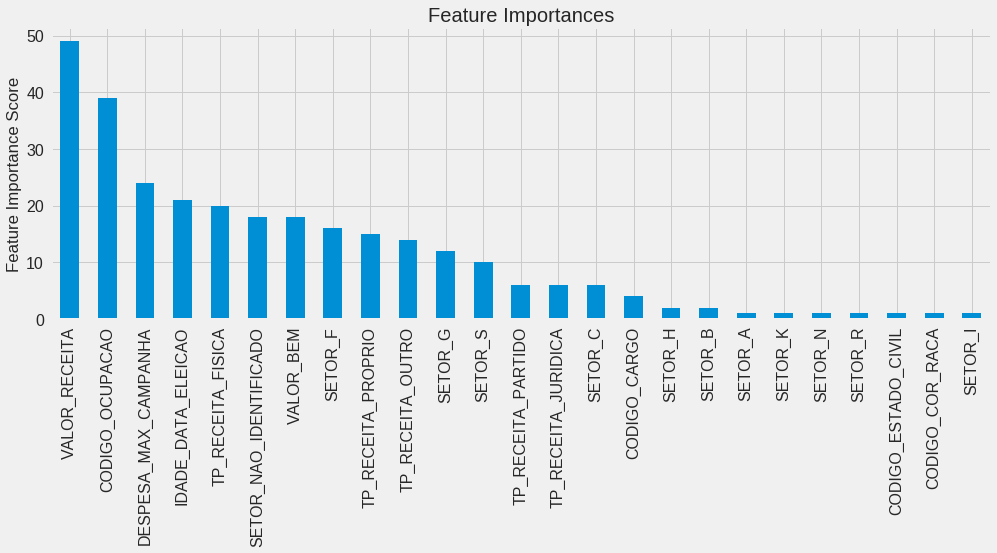

In [69]:
#Recalibra o número de estimators
xgb2 = XGBClassifier(learning_rate =0.1,
                     n_estimators=1000,
                     max_depth=3,
                     min_child_weight=4,
                     gamma=0.3,
                     subsample=0.85,
                     colsample_bytree=0.85,
                     objective= 'binary:logistic',
                     nthread=-1, scale_pos_weight=1, seed=27)

modelfit(xgb2, X_train, y_train, X_test, y_test)

In [70]:
#PASSO 4: busca os melhores valores para subsample e colsample_bytree
param_test4 = {'subsample': [i/10.0 for i in range(6,10)],
               'colsample_bytree':[i/10.0 for i in range(6,10)]
              }
clf = XGBClassifier(learning_rate =0.1, 
                    n_estimators=45, 
                    max_depth=3,
                    min_child_weight=4, 
                    gamma=0.3, 
                    subsample=0.85, 
                    colsample_bytree=0.85,
                    objective= 'binary:logistic', 
                    nthread=-1, scale_pos_weight=1, seed=27)

gsearch4 = GridSearchCV(estimator = clf, param_grid = param_test4, 
                        scoring='roc_auc',n_jobs=-1,iid=False, cv=5)
gsearch4.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.85,
       gamma=0.3, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=4, missing=None, n_estimators=45, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.85),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [71]:
show_results(gsearch4)

0.795 (+/-0.107) for {'colsample_bytree': 0.6, 'subsample': 0.6}
0.794 (+/-0.108) for {'colsample_bytree': 0.6, 'subsample': 0.7}
0.793 (+/-0.105) for {'colsample_bytree': 0.6, 'subsample': 0.8}
0.794 (+/-0.106) for {'colsample_bytree': 0.6, 'subsample': 0.9}
0.796 (+/-0.109) for {'colsample_bytree': 0.7, 'subsample': 0.6}
0.794 (+/-0.104) for {'colsample_bytree': 0.7, 'subsample': 0.7}
0.794 (+/-0.105) for {'colsample_bytree': 0.7, 'subsample': 0.8}
0.795 (+/-0.105) for {'colsample_bytree': 0.7, 'subsample': 0.9}
0.795 (+/-0.103) for {'colsample_bytree': 0.8, 'subsample': 0.6}
0.796 (+/-0.103) for {'colsample_bytree': 0.8, 'subsample': 0.7}
0.796 (+/-0.105) for {'colsample_bytree': 0.8, 'subsample': 0.8}
0.793 (+/-0.106) for {'colsample_bytree': 0.8, 'subsample': 0.9}
0.793 (+/-0.111) for {'colsample_bytree': 0.9, 'subsample': 0.6}
0.794 (+/-0.104) for {'colsample_bytree': 0.9, 'subsample': 0.7}
0.796 (+/-0.104) for {'colsample_bytree': 0.9, 'subsample': 0.8}
0.792 (+/-0.104) for {'co

In [72]:
#Agora faz uma busca em torno dos melhores valores, com uma sintonia fina de 0,05 de intervalo entre os melhores valores
param_test5 = {'subsample': [i/100.0 for i in range(75,90,5)],
               'colsample_bytree':[i/100.0 for i in range(75,90,5)]
              }

clf = XGBClassifier(learning_rate =0.1, 
                    n_estimators=45, 
                    max_depth=3,
                    min_child_weight=4, 
                    gamma=0.3, 
                    subsample=0.85, 
                    colsample_bytree=0.85,
                    objective= 'binary:logistic', 
                    nthread=-1, scale_pos_weight=1, seed=27)

gsearch5 = GridSearchCV(estimator = clf, param_grid = param_test5, 
                        scoring='roc_auc',n_jobs=-1,iid=False, cv=5)

gsearch5.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.85,
       gamma=0.3, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=4, missing=None, n_estimators=45, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.85),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'subsample': [0.75, 0.8, 0.85], 'colsample_bytree': [0.75, 0.8, 0.85]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [73]:
show_results(gsearch5)

0.797 (+/-0.104) for {'colsample_bytree': 0.75, 'subsample': 0.75}
0.796 (+/-0.106) for {'colsample_bytree': 0.75, 'subsample': 0.8}
0.795 (+/-0.101) for {'colsample_bytree': 0.75, 'subsample': 0.85}
0.796 (+/-0.104) for {'colsample_bytree': 0.8, 'subsample': 0.75}
0.796 (+/-0.105) for {'colsample_bytree': 0.8, 'subsample': 0.8}
0.794 (+/-0.099) for {'colsample_bytree': 0.8, 'subsample': 0.85}
0.795 (+/-0.104) for {'colsample_bytree': 0.85, 'subsample': 0.75}
0.795 (+/-0.105) for {'colsample_bytree': 0.85, 'subsample': 0.8}
0.798 (+/-0.096) for {'colsample_bytree': 0.85, 'subsample': 0.85}

Best Param: {'colsample_bytree': 0.85, 'subsample': 0.85}

Best Score: 0.798492322058


In [74]:
#PASSO 5 - Ajustando  reg_alpha
param_test6 = {'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]}

clf = XGBClassifier(learning_rate =0.1, 
                    n_estimators=45, 
                    max_depth=3,
                    min_child_weight=4, 
                    gamma=0.3, 
                    subsample=0.85, 
                    colsample_bytree=0.85,
                    objective= 'binary:logistic', 
                    nthread=-1, scale_pos_weight=1,seed=27)

gsearch6 = GridSearchCV(estimator = clf, param_grid = param_test6, 
                        scoring='roc_auc', n_jobs=-1, iid=False, cv=5)

gsearch6.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.85,
       gamma=0.3, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=4, missing=None, n_estimators=45, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.85),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'reg_alpha': [1e-05, 0.01, 0.1, 1, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [75]:
show_results(gsearch6)

0.798 (+/-0.096) for {'reg_alpha': 1e-05}
0.798 (+/-0.099) for {'reg_alpha': 0.01}
0.797 (+/-0.102) for {'reg_alpha': 0.1}
0.796 (+/-0.097) for {'reg_alpha': 1}
0.727 (+/-0.116) for {'reg_alpha': 100}

Best Param: {'reg_alpha': 1e-05}

Best Score: 0.798492322058


In [76]:
param_test7 = {'reg_alpha':[1e-3, 1e-4, 1e-5, 1e-6]}

clf = XGBClassifier(learning_rate =0.1, 
                    n_estimators=45, 
                    max_depth=3,
                    min_child_weight=4, 
                    gamma=0.3, 
                    subsample=0.85, 
                    colsample_bytree=0.85,
                    objective= 'binary:logistic', 
                    nthread=-1, scale_pos_weight=1,seed=27)

gsearch7 = GridSearchCV(estimator = clf, param_grid = param_test7, 
                        scoring='roc_auc',n_jobs=-1,iid=False, cv=5)

gsearch7.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.85,
       gamma=0.3, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=4, missing=None, n_estimators=45, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.85),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'reg_alpha': [0.001, 0.0001, 1e-05, 1e-06]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [77]:
show_results(gsearch7)

0.798 (+/-0.096) for {'reg_alpha': 0.001}
0.798 (+/-0.096) for {'reg_alpha': 0.0001}
0.798 (+/-0.096) for {'reg_alpha': 1e-05}
0.798 (+/-0.096) for {'reg_alpha': 1e-06}

Best Param: {'reg_alpha': 0.001}

Best Score: 0.798492322058


n_estimators= 45

Model Report
Accuracy (Train): 0.7759
AUC Score (Train): 0.854956
F1 Score (Train): 0.780944

Accuracy (Test) : 0.9444
AUC Score (Test): 0.964140
F1 Score (Test): 0.672941


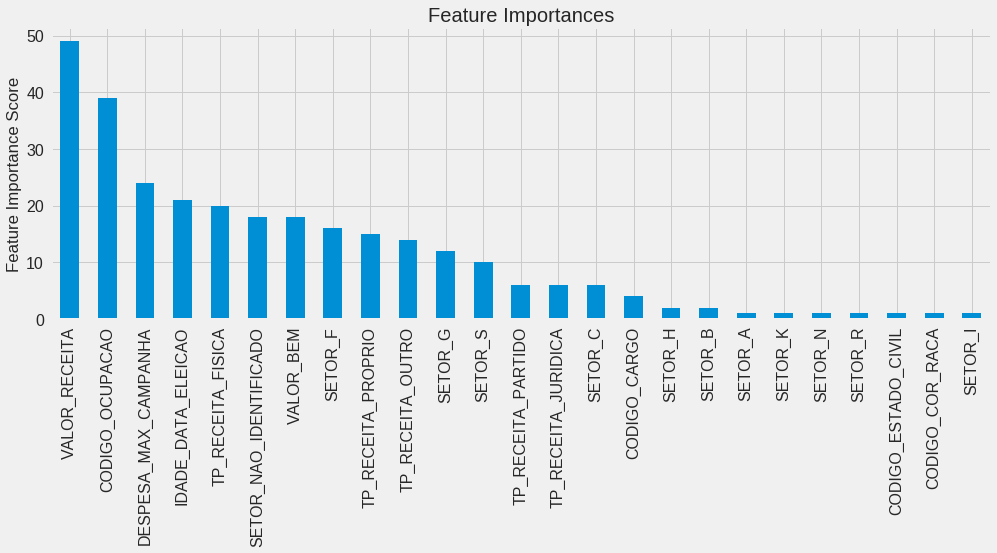

In [78]:
# Visualização do impacto do reg_alpha
xgb3 = XGBClassifier(learning_rate =0.1,
                     n_estimators=1000,
                     max_depth=3,
                     min_child_weight=4,
                     gamma=0.3,
                     subsample=0.85,
                     colsample_bytree=0.85,
                     reg_alpha=0.001, 
                     objective= 'binary:logistic',
                     nthread=-1,
                     scale_pos_weight=1,
                     seed=27)

modelfit(xgb3, X_train, y_train, X_test, y_test)

n_estimators= 601

Model Report
Accuracy (Train): 0.7891
AUC Score (Train): 0.871519
F1 Score (Train): 0.793764

Accuracy (Test) : 0.9458
AUC Score (Test): 0.966726
F1 Score (Test): 0.679290


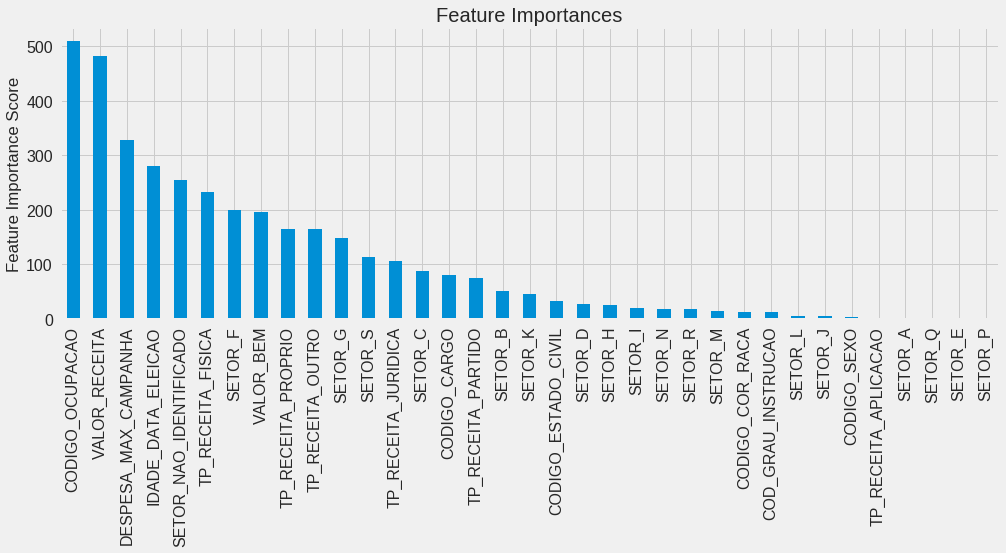

In [79]:
# PASSO 6: Reduzindo Learning Rate
xgb4 = XGBClassifier(learning_rate =0.01,
                     n_estimators=1000,
                     max_depth=3,
                     min_child_weight=4,
                     gamma=0.3,
                     subsample=0.85,
                     colsample_bytree=0.85,
                     reg_alpha=0.001, 
                     objective= 'binary:logistic',
                     nthread=-1, scale_pos_weight=1, seed=27)
modelfit(xgb4, X_train, y_train, X_test, y_test)

#### Com o melhor paremetro escolhido, verificar o desempenho no dataset de teste

In [80]:
def show_scores(test, predic):
    f1 = f1_score(test, predic)
    roc = roc_auc_score(test, predic)
    return f1, roc


In [81]:
clf_xgb = XGBClassifier()

xgb_model = clf_xgb.fit(X_train, y_train)
predictions = xgb_model.predict(X_test)
f1, roc = show_scores(y_test, predictions)
print('Sem ajustes:')
print('Predict F1 Score:', f1)
print('Predict roc auc score:', roc)
print('-'*10)

xgb_params = {} 
xgb_params['learning_rate'] = 0.01  
xgb_params['n_estimators'] = 601
xgb_params['max_depth'] = 3
xgb_params['min_child_weight'] = 4
xgb_params['gamma'] = 0.3
xgb_params['subsample'] = 0.85
xgb_params['colsample_bytree'] = 0.85
xgb_params['reg_alpha'] = 0.001
xgb_params['nthread'] = -1
xgb_params['scale_pos_weight'] = 1
xgb_params['seed'] = 27

clf_xgb = XGBClassifier(**xgb_params)

xgb_model = clf_xgb.fit(X_train, y_train)
predictions = xgb_model.predict(X_test)
f1, roc = show_scores(y_test, predictions)
print('Ajustado:')
print('Predict F1 Score:', f1)
print('Predict roc auc score:', roc)

Sem ajustes:
Predict F1 Score: 0.66587957497
Predict roc auc score: 0.850173937042
----------
Ajustado:
Predict F1 Score: 0.679289940828
Predict roc auc score: 0.857492864777


In [82]:
clf_rf = RandomForestClassifier()

clf_rf = clf_rf.fit(X_train, y_train)
predictions = clf_rf.predict(X_test)
f1, roc = show_scores(y_test, predictions)

print('Sem ajustes:')
print('Predict F1 Score:', f1)
print('Predict roc auc score:', roc)
print('-'*10)

rf_params = {}  

rf_params['bootstrap'] = True 
rf_params['class_weight'] = 'balanced'
rf_params['random_state'] = 42
rf_params['criterion'] = 'entropy'
rf_params['max_depth'] = 30
rf_params['max_features'] = 23
rf_params['min_samples_leaf'] = 4
rf_params['min_samples_split'] = 2
rf_params['n_estimators'] = 173
rf_params['n_jobs'] = -1

clf_rf = RandomForestClassifier(**rf_params)

rf_model = clf_rf.fit(X_train, y_train)
predictions = rf_model.predict(X_test)
f1, roc = show_scores(y_test, predictions)
print('Predict F1 Score:', f1)
print('Predict roc auc score:', roc)


Sem ajustes:
Predict F1 Score: 0.581339712919
Predict roc auc score: 0.795963842901
----------
Predict F1 Score: 0.675449101796
Predict roc auc score: 0.851472076376


In [83]:
clf_gnb = GaussianNB()

gnb_model = clf_gnb.fit(X_train, y_train)
predictions = gnb_model.predict(X_test)
f1, roc = show_scores(y_test, predictions)
print('Predict F1 Score:', f1)
print('Predict roc auc score:', roc)

Predict F1 Score: 0.397748592871
Predict roc auc score: 0.63413141077


In [84]:
def teste_final(X,y, model, tests=3):
    scores = []
    for i in range(tests):
        _, X_test_f, _, y_test_f = train_test_split(X,y,test_size=0.10)
        predict = model.predict(X_test_f)
        scores.append(f1_score(y_test_f, predict))
    
    return np.mean(scores)

In [85]:
f1_scores_xgb = []
f1_scores_rf = []
f1_scores_gnb = []
tests = 100

for i in range(tests):
    f1_scores_rf.append(np.mean(teste_final(X_test,y_test, rf_model)))
    f1_scores_xgb.append(np.mean(teste_final(X_test,y_test, xgb_model)))
    f1_scores_gnb.append(np.mean(teste_final(X_test,y_test, gnb_model)))

In [86]:
print('Mean RF F1 Score', np.mean(f1_scores_rf))
print('Mean XGB F1 Score', np.mean(f1_scores_xgb))
print('-'*20)
print('Valores de Benchmark')
print('Mean GNB F1 Score', np.mean(f1_scores_gnb))
print('Pesquisa Benchmark F1 Score', np.mean(f1_scores_gnb))

p = figure(plot_height=PLOT_H, plot_width=PLOT_W)
p.title.align = 'center'
p.title.text = 'Desempenho dos classificadores - Teste final'
p.title.text_font_size = '14px'
p.yaxis.axis_label = 'F1 Score'
p.xaxis.axis_label = 'Test'    


x = list(np.arange(tests)+1)

p.line(x, sorted(f1_scores_xgb), legend='XGB F1 Score', line_color='Green', line_dash="solid") 
p.line(x, sorted(f1_scores_rf), legend='RF F1 Score', line_color='Red', line_dash="dotted") 
p.line(x, sorted(f1_scores_gnb), legend='GNB F1 Score', line_color='Black', line_dash="solid") 


    
p.legend.background_fill_alpha = 0.5
p.legend.location = "bottom_right"       
    
show(p)

Mean RF F1 Score 0.671017681568
Mean XGB F1 Score 0.673372841344
--------------------
Valores de Benchmark
Mean GNB F1 Score 0.391289176069
Pesquisa Benchmark F1 Score 0.391289176069


In [87]:
# Busca os dados que foram usados na pesquisa para testar o modelo
df_pesquisa_federal = df_pesquisa[df_pesquisa['CODIGO_CARGO'] == 6].copy() # Deputado federal
y_pesquisa_federal = df_pesquisa_federal['TARGET']
df_pesquisa_federal.drop('TARGET', axis=1, inplace=True)

df_pesquisa_estadual = df_pesquisa[df_pesquisa['CODIGO_CARGO'] == 7].copy() # Deputado federal
y_pesquisa_estadual = df_pesquisa_estadual['TARGET']
df_pesquisa_estadual.drop('TARGET', axis=1, inplace=True)

df_pesquisa_geral = df_pesquisa.copy() 
y_pesquisa_geral = df_pesquisa_geral['TARGET']
df_pesquisa_geral.drop('TARGET', axis=1, inplace=True)

In [88]:
# Testa em todos os dados da pesquisa
predictions = xgb_model.predict(df_pesquisa_geral)
f1, roc = show_scores(y_pesquisa_geral, predictions)
print('XGB:')
print('Predict F1 Score:', f1)
print('Predict roc auc score:', roc)

XGB:
Predict F1 Score: 0.69298245614
Predict roc auc score: 0.933607728806


In [89]:
# Testa apenas nos dados da pesquisa estadual
predictions = xgb_model.predict(df_pesquisa_estadual)
f1, roc = show_scores(y_pesquisa_estadual, predictions)
print('XGB:')
print('Predict F1 Score:', f1)
print('Predict roc auc score:', roc)

XGB:
Predict F1 Score: 0.685990338164
Predict roc auc score: 0.930181220453


In [90]:
# Testa apenas nos dados da pesquisa federal
predictions = xgb_model.predict(df_pesquisa_federal)
f1, roc = show_scores(y_pesquisa_federal, predictions)
print('XGB:')
print('Predict F1 Score:', f1)
print('Predict roc auc score:', roc)


XGB:
Predict F1 Score: 0.761904761905
Predict roc auc score: 0.965753424658


### Separação do dataset para cada UF
#### Para verificar o desempenho do modelo em cada UF diferente

In [91]:
# Concatena o dataset de pesquisa
df_completo = df_pesquisa_geral.copy()
df_completo['TARGET'] = y_pesquisa_geral
df_completo = pd.concat([df_cand, df_completo])
print('Concat OK' if df_pesquisa.shape[0]+df_cand.shape[0] == df_completo.shape[0] else '')
# Ordena as colunas
df_completo = df_completo[list(df_cand.columns)] 

Concat OK


In [92]:
# Testa o modelo em cada UF separadamente
uf_list = []
f1_fed = []
f1_est = []
for uf in df['SIGLA_UF'].unique():
    df_uf = df_completo.loc[list(df[df['SIGLA_UF']==uf].index)]
    uf_list.append(uf)
    for cod_cargo in df_uf['CODIGO_CARGO'].unique():
        df_uf_cargo = df_uf[df_uf['CODIGO_CARGO'] == cod_cargo].copy()
        y_uf = df_uf_cargo['TARGET']
        df_uf_cargo.drop('TARGET', axis=1, inplace=True)
        predictions = xgb_model.predict(df_uf_cargo)
        f1, roc = show_scores(y_uf, predictions)
        
        if cod_cargo == 6:
            f1_fed.append(f1)
        else:
            f1_est.append(f1)
    
uf_list, f1_fed  = zip(*sorted(zip(uf_list, f1_fed)))
uf_list, f1_est  = zip(*sorted(zip(uf_list, f1_est)))


In [93]:
df_test_uf = pd.DataFrame({'UF':uf_list,
                           'F1_EST':f1_est,
                           'F1_FED':f1_fed},
                         columns=['UF', 'F1_EST', 'F1_FED'])
df_test_uf.sort_values(by=['F1_FED','F1_EST'], ascending=False, inplace=True)
df_test_uf

,UF,F1_EST,F1_FED
1,AL,0.81,0.95
14,PB,0.74,0.92
19,RN,0.86,0.89
2,AM,0.65,0.89
8,GO,0.63,0.85
12,MT,0.71,0.84
22,RS,0.72,0.83
17,PR,0.76,0.82
5,CE,0.72,0.82
10,MG,0.69,0.81


In [94]:
uf_list = list(df_test_uf['UF'])
f1_fed = list(df_test_uf['F1_FED'])
f1_est = list(df_test_uf['F1_EST'])
tipo = ['ESTADUAL','FEDERAL']
pesquisa_benchmark = list(itertools.repeat(0.49, df_test_uf.shape[0]))
print('F1 mean Federal', np.mean(f1_fed))
print('F1 mean Estadual',np.mean(f1_est))

F1 mean Federal 0.754544014999
F1 mean Estadual 0.700128497514


In [95]:
data = {'uf_list' : uf_list,
        'f1_est'  : f1_est,
        'f1_fed'  : f1_fed}
source = ColumnDataSource(data=data)

p = figure(x_range=uf_list, y_range=(0, 1), plot_height=PLOT_H, plot_width=PLOT_W)

p.vbar(x=dodge('uf_list', -0.2, range=p.x_range), top='f1_fed', width=0.4, source=source,
       color=Pastel1[3][0], legend=value("F1 dep. federal"))

p.vbar(x=dodge('uf_list', 0.2, range=p.x_range), top='f1_est', width=0.4, source=source,
       color=Pastel1[3][1], legend=value("F1 dep. estadual"))

p.line(x=uf_list, y=pesquisa_benchmark, color="red", line_width=1, legend=value("Benchmark"))

p.xgrid.grid_line_color = None
p.legend.location = "top_right"
p.legend.orientation = "horizontal"

p.title.text = 'Desempenho do modelo XGBoost em cada UF'
p.title.align = 'center'
p.title.text_font_size = '14px'
p.yaxis.axis_label = 'F1 Score'
p.xaxis.axis_label = 'UF'    


show(p)